In [1]:
!nvidia-smi

Tue Oct 22 11:39:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

In [4]:
from IPython.display import display, Image

In [5]:
pip show ultralytics

Name: ultralytics
Version: 8.3.19
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [6]:
# Install gdown untuk mendownload file dari Google Drive
!pip install gdown

import gdown
import zipfile
import os

# URL Direct Download Link Google Drive
#dari file/d/ ganti jadi uc?id= lalu /view?usp=sharing hapus
url = "https://drive.google.com/uc?id=1nAS50kajJvx0CRA_7YIijsgOiq3ztAyA"  # Ganti dengan direct download link Anda
#https://drive.google.com/file/d/1ChDMxp-KPbt3Hrei4F97vlBToNmQqeK8/view?usp=sharing

# Path untuk menyimpan file di Kaggle Notebook
output = "dataset.zip"

# Download file dari Google Drive
gdown.download(url, output, quiet=False)

# Unzip file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(".")

# Optionally, hapus file zip setelah diekstrak
os.remove(output)

Downloading...
From (original): https://drive.google.com/uc?id=1nAS50kajJvx0CRA_7YIijsgOiq3ztAyA
From (redirected): https://drive.google.com/uc?id=1nAS50kajJvx0CRA_7YIijsgOiq3ztAyA&confirm=t&uuid=58d40928-3479-4694-92a6-8fb80ec5eb04
To: /content/dataset.zip
100%|██████████| 3.21G/3.21G [00:33<00:00, 94.5MB/s]


## Anotasi

In [ ]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless

Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Would remove:
    /opt/conda/lib/python3.10/site-packages/cv2/*
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless-4.10.0.84.dist-info/*
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless.libs/libavcodec-9aae324f.so.59.37.100
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless.libs/libavformat-3ff1be5b.so.59.27.100
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless.libs/libavutil-a0a0531e.so.57.28.100
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless.libs/libcrypto-337dac8b.so.1.1
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /opt/conda/lib/python3.10/site-packages/opencv_python_headless.libs/libpng16-1bde1c40.so.16.43.0
    /opt/conda/li

In [ ]:
""""ini buat anotasi gambar untuk struktur dataset seperti berikut
/Dataset
├── train
│   ├── class1
|            ├── img1.jpg
|            ├── img2.jpg
│   ├── class2
|            ├── img1.jpg
|            ├── img2.jpg
├── valid
│   ├── class1
|            ├── img1.jpg
|            ├── img2.jpg
│   ├── class2
|            ├── img1.jpg
|            ├── img2.jpg
├── test
│   ├── class1
|            ├── img1.jpg
|            ├── img2.jpg
│   ├── class2
|            ├── img1.jpg
|            ├── img2.jpg
"""


import os
import cv2
from ultralytics import YOLO

# Load your YOLOv8 model
model = YOLO('best26.pt')  # Pastikan model 'best.pt' ada di direktori yang benar

# Define a dictionary to map folder names to class IDs
class_map = {
    'actinic-keratosis': 0,
    'basal-cell-carcinoma': 1,
    'dermatofibra': 2,
    'melanoma': 3,
    'nevus': 4,
    'pigmented-benign-keratosis': 5,
    'seborrheic-keratosis': 6,
    'solar-lentigo': 7,
    'squamous-cell-carcinoma': 8,
    'vascular-lesion': 9
}

# Function to process a folder and save annotations
def process_folder(input_dir, output_dir, class_name):
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
    class_id = class_map.get(class_name, -1)  # Get class ID from the folder name, default to -1 if not found

    # Loop through all images in the input directory
    for img_file in os.listdir(input_dir):
        if img_file.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(input_dir, img_file)
            img = cv2.imread(img_path)

            # Get image dimensions
            h, w, _ = img.shape  # Height and width of the image

            # Detect bounding boxes using the model
            results = model.predict(source=img, save=False)  # Remove confidence threshold to take all predictions

            # Check if any boxes are detected
            if len(results) > 0:
                boxes = results[0].boxes.xywh.cpu().numpy()  # Get bounding boxes (x_center, y_center, width, height)
                confs = results[0].boxes.conf.cpu().numpy()  # Get confidence scores

                if len(confs) > 0:
                    # Get the index of the box with the highest confidence
                    best_box_idx = confs.argmax()

                    # Get the best box
                    best_box = boxes[best_box_idx]
                    x_center, y_center, bbox_width, bbox_height = best_box[:4]  # Only use the first 4 elements

                    # Normalize the coordinates by dividing by image width and height
                    x_center /= w
                    y_center /= h
                    bbox_width /= w
                    bbox_height /= h

                    # Write annotations to a label file (YOLO format: class_id x_center y_center width height)
                    label_file = os.path.join(output_dir, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))
                    with open(label_file, 'w') as f:
                        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# Main function to process train and valid folders
def annotate_dataset(dataset_base_dir):
    # Define paths for train and valid
    train_dir = os.path.join(dataset_base_dir, 'train')
    valid_dir = os.path.join(dataset_base_dir, 'valid')
    test_dir = os.path.join(dataset_base_dir, 'test')

    # Define output directories for labels
    train_output_dir = os.path.join(dataset_base_dir, 'labels-train')
    valid_output_dir = os.path.join(dataset_base_dir, 'labels-valid')
    test_output_dir = os.path.join(dataset_base_dir, 'labels-test')

    # Process the train folder
    for class_name in os.listdir(train_dir):
        class_input_dir = os.path.join(train_dir, class_name)
        class_output_dir = os.path.join(train_output_dir, class_name)
        process_folder(class_input_dir, class_output_dir, class_name)

    # Process the valid folder
    for class_name in os.listdir(valid_dir):
        class_input_dir = os.path.join(valid_dir, class_name)
        class_output_dir = os.path.join(valid_output_dir, class_name)
        process_folder(class_input_dir, class_output_dir, class_name)

    # Process the test folder
    for class_name in os.listdir(test_dir):
        class_input_dir = os.path.join(test_dir, class_name)
        class_output_dir = os.path.join(test_output_dir, class_name)
        process_folder(class_input_dir, class_output_dir, class_name)

# Path ke folder Dataset-Athaya
dataset_base_dir = 'Dataset-Athaya-4.0-resize'

# Jalankan fungsi anotasi
annotate_dataset(dataset_base_dir)

print(f"Annotations saved to labels and labels-valid folders")


Streaming output truncated to the last 5000 lines.
Speed: 1.9ms preprocess, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 actinic keratosis, 1 basal cell carcinoma, 1 squamous cell carcinoma, 17.6ms
Speed: 3.3ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 actinic keratosis, 17.7ms
Speed: 2.1ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 basal cell carcinoma, 17.6ms
Speed: 2.6ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 actinic keratosis, 17.3ms
Speed: 2.0ms preprocess, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 seborrheic keratosis, 17.1ms
Speed: 2.1ms preprocess, 17.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 actinic keratosis, 1 basal cell carcinoma, 17.5ms
Speed: 1.8ms preprocess, 17.5ms inference, 1.5

In [ ]:
"""untuk menghitung jumlah labels setiap kelas dari tiga folder
labels-train, labels-valid, labels-test"""

import os
from collections import defaultdict

# Fungsi untuk menghitung jumlah gambar berdasarkan class_id di dalam file label
def count_images_per_class(label_dir):
    class_count = defaultdict(int)

    for class_folder in os.listdir(label_dir):
        class_folder_path = os.path.join(label_dir, class_folder)
        if os.path.isdir(class_folder_path):  # Memastikan ini adalah folder
            for label_file in os.listdir(class_folder_path):
                if label_file.endswith('.txt'):
                    label_path = os.path.join(class_folder_path, label_file)
                    with open(label_path, 'r') as f:
                        lines = f.readlines()
                        if lines:
                            class_id = int(lines[0].split()[0])  # Ambil digit pertama (class_id)
                            class_count[class_id] += 1

    return class_count

# Fungsi untuk menghitung total per subset (labels-train, labels-valid, labels-test)
def count_all_images(dataset_dir):
    subsets = ['labels-train', 'labels-valid', 'labels-test']
    total_count = {}

    for subset in subsets:
        label_dir = os.path.join(dataset_dir, subset)
        count_per_class = count_images_per_class(label_dir)
        total_count[subset] = count_per_class

    return total_count

# Jalankan fungsi
dataset_dir = 'Dataset-Athaya-4.0-resize'  # Ganti dengan path ke dataset-mu
class_counts = count_all_images(dataset_dir)

# Tampilkan hasil
for subset, counts in class_counts.items():
    print(f"\nJumlah gambar per kelas di folder {subset}:")
    for class_id, count in counts.items():
        print(f"Class {class_id}: {count} images")



Jumlah gambar per kelas di folder labels-train:
Class 7: 3461 images
Class 3: 3495 images
Class 1: 3462 images
Class 0: 3467 images
Class 2: 3499 images
Class 4: 3490 images
Class 6: 3493 images
Class 5: 3500 images
Class 8: 3476 images
Class 9: 3499 images

Jumlah gambar per kelas di folder labels-valid:
Class 7: 197 images
Class 3: 197 images
Class 1: 196 images
Class 0: 193 images
Class 2: 194 images
Class 4: 198 images
Class 6: 199 images
Class 5: 199 images
Class 8: 195 images
Class 9: 200 images

Jumlah gambar per kelas di folder labels-test:
Class 7: 17 images
Class 3: 43 images
Class 1: 45 images
Class 0: 49 images
Class 2: 15 images
Class 4: 49 images
Class 6: 43 images
Class 5: 39 images
Class 8: 44 images
Class 9: 11 images


In [ ]:
"""ini buat ganti class_id yang class_idnya salah"""

import os

# Fungsi untuk mengubah digit pertama di dalam file .txt
def update_class_id_in_txt(folder_path, old_value, new_value):
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                lines = f.readlines()

            # Buat list untuk menyimpan line yang sudah di-update
            updated_lines = []
            for line in lines:
                parts = line.split()
                if len(parts) > 0 and parts[0] == str(old_value):
                    parts[0] = str(new_value)  # Mengubah nilai pertama
                updated_lines.append(" ".join(parts) + "\n")

            # Tulis ulang file dengan nilai yang di-update
            with open(file_path, 'w') as f:
                f.writelines(updated_lines)

    print(f"Semua file di folder '{folder_path}' telah di-update.")

# Path ke folder A
folder_A = 'Dataset-Athaya-2.0/labels-valid/vascular-lesion'  # Ganti dengan path folder A
old_class_id = -1  # Class ID lama yang ingin diubah
new_class_id = 8   # Class ID baru

# Jalankan fungsi
update_class_id_in_txt(folder_A, old_class_id, new_class_id)


Semua file di folder 'Dataset-Athaya-2.0/labels-valid/vascular-lesion' telah di-update.


## Menghitung gambar yang tidak terdeteksi

In [ ]:
import os

# Fungsi untuk menghitung dan menampilkan gambar yang tidak mempunyai file label .txt
def find_images_without_labels(image_dir, label_dir):
    missing_labels = []

    # Loop melalui semua gambar di folder image_dir
    for img_file in os.listdir(image_dir):
        if img_file.endswith(('.jpg', '.jpeg', '.png')):
            # Nama file label yang sesuai dengan file gambar
            label_file = os.path.join(label_dir, img_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

            # Jika file label tidak ada, tambahkan ke daftar missing_labels
            if not os.path.exists(label_file):
                missing_labels.append(img_file)

    # Tampilkan hasil
    print(f"Total images without labels: {len(missing_labels)}")
    if missing_labels:
        print("List of images without labels:")
        for img in missing_labels:
            print(img)
    else:
        print("All images have labels.")

    return missing_labels

# Path ke folder Dataset
dataset_base_dir = 'Dataset-Athaya-4.0-resize'

# Cek di folder 'train' dan 'valid'
train_image_dir = os.path.join(dataset_base_dir, 'train')
train_label_dir = os.path.join(dataset_base_dir, 'labels-train')

valid_image_dir = os.path.join(dataset_base_dir, 'valid')
valid_label_dir = os.path.join(dataset_base_dir, 'labels-valid')

test_image_dir = os.path.join(dataset_base_dir, 'test')
test_label_dir = os.path.join(dataset_base_dir, 'labels-test')

# Cek gambar tanpa label di folder train
print("Checking missing labels in train dataset:")
train_missing_labels = []
for class_name in os.listdir(train_image_dir):
    class_image_dir = os.path.join(train_image_dir, class_name)
    class_label_dir = os.path.join(train_label_dir, class_name)
    train_missing_labels.extend(find_images_without_labels(class_image_dir, class_label_dir))

# Cek gambar tanpa label di folder valid
print("\nChecking missing labels in valid dataset:")
valid_missing_labels = []
for class_name in os.listdir(valid_image_dir):
    class_image_dir = os.path.join(valid_image_dir, class_name)
    class_label_dir = os.path.join(valid_label_dir, class_name)
    valid_missing_labels.extend(find_images_without_labels(class_image_dir, class_label_dir))

# Cek gambar tanpa label di folder valid
print("\nChecking missing labels in valid dataset:")
test_missing_labels = []
for class_name in os.listdir(test_image_dir):
    class_image_dir = os.path.join(test_image_dir, class_name)
    class_label_dir = os.path.join(test_label_dir, class_name)
    test_missing_labels.extend(find_images_without_labels(class_image_dir, class_label_dir))

# Total gambar tanpa label di kedua folder
print("\nSummary:")
total_missing_labels = len(train_missing_labels) + len(valid_missing_labels) +len(test_missing_labels)
print(f"Total images without labels in train: {len(train_missing_labels)}")
print(f"Total images without labels in valid: {len(valid_missing_labels)}")
print(f"Total images without labels in test: {len(test_missing_labels)}")
print(f"Total images without labels: {total_missing_labels}")


Checking missing labels in train dataset:
Total images without labels: 39
List of images without labels:
aug_974_ISIC_0073039.jpg
aug_1462_ISIC_0013061.jpg
aug_3131_ISIC_9348198.jpg
ISIC_9348198.jpg
aug_875_ISIC_9348198.jpg
aug_3067_ISIC_9487340.jpg
aug_511_ISIC_9348198.jpg
aug_1246_ISIC_5731511.jpg
aug_795_ISIC_5731511.jpg
aug_2028_ISIC_9348198.jpg
aug_1046_ISIC_0073039.jpg
aug_2531_ISIC_9487340.jpg
aug_1226_ISIC_1733131.jpg
aug_3121_ISIC_5731511.jpg
ISIC_9487340.jpg
ISIC_0013061.jpg
aug_862_ISIC_0013061.jpg
ISIC_5731511.jpg
aug_1288_ISIC_5731511.jpg
aug_1253_ISIC_5731511.jpg
aug_2614_ISIC_0013061.jpg
aug_2607_ISIC_0012812.jpg
aug_2493_ISIC_5731511.jpg
aug_3298_ISIC_9348198.jpg
aug_1370_ISIC_9487340.jpg
aug_794_ISIC_5731511.jpg
aug_3440_ISIC_0592761.jpg
aug_1696_ISIC_9487340.jpg
aug_3061_ISIC_0013061.jpg
aug_2121_ISIC_9487340.jpg
aug_2610_ISIC_5731511.jpg
aug_1217_ISIC_0013061.jpg
aug_2802_ISIC_5731511.jpg
aug_2922_ISIC_0013061.jpg
aug_1121_ISIC_9487340.jpg
aug_508_ISIC_0013061.jpg
au

## Menghapus gambar yang tidak mempunyai file txt

In [ ]:
import os

# Fungsi untuk menghapus gambar yang tidak memiliki file label .txt
def delete_images_without_labels(image_dir, label_dir):
    deleted_images = []

    # Loop melalui semua gambar di folder image_dir
    for img_file in os.listdir(image_dir):
        if img_file.endswith(('.jpg', '.jpeg', '.png')):
            # Nama file label yang sesuai dengan file gambar
            label_file = os.path.join(label_dir, img_file.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt'))

            # Jika file label tidak ada, hapus gambar
            if not os.path.exists(label_file):
                img_path = os.path.join(image_dir, img_file)
                os.remove(img_path)  # Menghapus gambar
                deleted_images.append(img_file)  # Tambahkan gambar yang dihapus ke daftar

    # Tampilkan hasil
    print(f"Total images deleted: {len(deleted_images)}")
    if deleted_images:
        print("List of deleted images:")
        for img in deleted_images:
            print(img)
    else:
        print("No images were deleted. All images have labels.")

# Path ke folder Dataset
dataset_base_dir = 'Dataset-Athaya-4.0-resize'

# Cek di folder 'train' dan 'valid'
train_image_dir = os.path.join(dataset_base_dir, 'train')
train_label_dir = os.path.join(dataset_base_dir, 'labels-train')

valid_image_dir = os.path.join(dataset_base_dir, 'valid')
valid_label_dir = os.path.join(dataset_base_dir, 'labels-valid')

test_image_dir = os.path.join(dataset_base_dir, 'test')
test_label_dir = os.path.join(dataset_base_dir, 'labels-test')

# Hapus gambar tanpa label di folder train
print("Deleting images without labels in train dataset:")
for class_name in os.listdir(train_image_dir):
    class_image_dir = os.path.join(train_image_dir, class_name)
    class_label_dir = os.path.join(train_label_dir, class_name)
    delete_images_without_labels(class_image_dir, class_label_dir)

# Hapus gambar tanpa label di folder valid
print("\nDeleting images without labels in valid dataset:")
for class_name in os.listdir(valid_image_dir):
    class_image_dir = os.path.join(valid_image_dir, class_name)
    class_label_dir = os.path.join(valid_label_dir, class_name)
    delete_images_without_labels(class_image_dir, class_label_dir)

# Hapus gambar tanpa label di folder test
print("\nDeleting images without labels in test dataset:")
for class_name in os.listdir(test_image_dir):
    class_image_dir = os.path.join(test_image_dir, class_name)
    class_label_dir = os.path.join(test_label_dir, class_name)
    delete_images_without_labels(class_image_dir, class_label_dir)


Deleting images without labels in train dataset:
Total images deleted: 39
List of deleted images:
aug_974_ISIC_0073039.jpg
aug_1462_ISIC_0013061.jpg
aug_3131_ISIC_9348198.jpg
ISIC_9348198.jpg
aug_875_ISIC_9348198.jpg
aug_3067_ISIC_9487340.jpg
aug_511_ISIC_9348198.jpg
aug_1246_ISIC_5731511.jpg
aug_795_ISIC_5731511.jpg
aug_2028_ISIC_9348198.jpg
aug_1046_ISIC_0073039.jpg
aug_2531_ISIC_9487340.jpg
aug_1226_ISIC_1733131.jpg
aug_3121_ISIC_5731511.jpg
ISIC_9487340.jpg
ISIC_0013061.jpg
aug_862_ISIC_0013061.jpg
ISIC_5731511.jpg
aug_1288_ISIC_5731511.jpg
aug_1253_ISIC_5731511.jpg
aug_2614_ISIC_0013061.jpg
aug_2607_ISIC_0012812.jpg
aug_2493_ISIC_5731511.jpg
aug_3298_ISIC_9348198.jpg
aug_1370_ISIC_9487340.jpg
aug_794_ISIC_5731511.jpg
aug_3440_ISIC_0592761.jpg
aug_1696_ISIC_9487340.jpg
aug_3061_ISIC_0013061.jpg
aug_2121_ISIC_9487340.jpg
aug_2610_ISIC_5731511.jpg
aug_1217_ISIC_0013061.jpg
aug_2802_ISIC_5731511.jpg
aug_2922_ISIC_0013061.jpg
aug_1121_ISIC_9487340.jpg
aug_508_ISIC_0013061.jpg
aug_2936_

## Restruktur dataset ke format YOLO

In [ ]:
import os
import shutil

# Fungsi untuk mengubah struktur dataset
def restructure_dataset(base_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    # Folder untuk image dan label train, valid, dan test
    images_train_dir = os.path.join(output_dir, 'train', 'images')
    labels_train_dir = os.path.join(output_dir, 'train', 'labels')
    images_valid_dir = os.path.join(output_dir, 'valid', 'images')
    labels_valid_dir = os.path.join(output_dir, 'valid', 'labels')
    images_test_dir = os.path.join(output_dir, 'test', 'images')
    labels_test_dir = os.path.join(output_dir, 'test', 'labels')

    # Buat direktori baru untuk train, valid, test
    os.makedirs(images_train_dir, exist_ok=True)
    os.makedirs(labels_train_dir, exist_ok=True)
    os.makedirs(images_valid_dir, exist_ok=True)
    os.makedirs(labels_valid_dir, exist_ok=True)
    os.makedirs(images_test_dir, exist_ok=True)
    os.makedirs(labels_test_dir, exist_ok=True)

    # Fungsi untuk memindahkan file
    def move_files(src_img_dir, src_label_dir, dest_img_dir, dest_label_dir):
        for class_name in os.listdir(src_img_dir):
            class_img_dir = os.path.join(src_img_dir, class_name)
            class_label_dir = os.path.join(src_label_dir, class_name)

            for img_file in os.listdir(class_img_dir):
                if img_file.endswith(('.jpg', '.jpeg', '.png')):
                    # Pindahkan gambar
                    src_img_path = os.path.join(class_img_dir, img_file)
                    dest_img_path = os.path.join(dest_img_dir, img_file)
                    shutil.move(src_img_path, dest_img_path)

                    # Pindahkan label yang sesuai
                    label_file = img_file.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
                    src_label_path = os.path.join(class_label_dir, label_file)
                    dest_label_path = os.path.join(dest_label_dir, label_file)

                    if os.path.exists(src_label_path):
                        shutil.move(src_label_path, dest_label_path)

    # Pindahkan file untuk train
    train_img_dir = os.path.join(base_dir, 'train')
    train_label_dir = os.path.join(base_dir, 'labels-train')
    move_files(train_img_dir, train_label_dir, images_train_dir, labels_train_dir)

    # Pindahkan file untuk valid
    valid_img_dir = os.path.join(base_dir, 'valid')
    valid_label_dir = os.path.join(base_dir, 'labels-valid')
    move_files(valid_img_dir, valid_label_dir, images_valid_dir, labels_valid_dir)

    # Pindahkan file untuk test
    test_img_dir = os.path.join(base_dir, 'test')
    test_label_dir = os.path.join(base_dir, 'labels-test')
    move_files(test_img_dir, test_label_dir, images_test_dir, labels_test_dir)

    print(f"Dataset successfully restructured and moved to {output_dir}")

# Fungsi untuk membuat file data.yaml
def create_data_yaml(output_dir, num_classes):
    data_yaml_content = f"""
train: {os.path.join(output_dir, 'train')}
val: {os.path.join(output_dir, 'valid')}
test: {os.path.join(output_dir, 'test')}

nc: {num_classes}  # Jumlah kelas

names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibra', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'solar lentigo', 'squamous cell carcinoma', 'vascular lesion']  # Ganti sesuai kelas Anda
"""
    with open(os.path.join(output_dir, 'data.yaml'), 'w') as f:
        f.write(data_yaml_content)
    print(f"data.yaml created at {output_dir}")

# Path ke folder Dataset-Athaya
base_dir = 'Dataset-Athaya-4.0-resize'
output_dir = 'datasets'
num_classes = 10  # Jumlah kelas Anda

# Jalankan fungsi untuk restrukturisasi dataset dan pembuatan file data.yaml
restructure_dataset(base_dir, output_dir)
create_data_yaml(output_dir, num_classes)


Dataset successfully restructured and moved to datasets
data.yaml created at datasets


In [31]:
"""menghitung jumlah gambar setiap kelas dari folder datasets"""

import os
from collections import defaultdict

# Fungsi untuk menghitung jumlah gambar per kelas berdasarkan file label
def count_images_per_class(label_dir):
    class_count = defaultdict(int)

    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            with open(label_path, 'r') as f:
                lines = f.readlines()
                if lines:
                    class_id = int(lines[0].split()[0])  # Ambil digit pertama (class_id)
                    class_count[class_id] += 1

    return class_count

# Fungsi untuk menghitung total per subset (train, valid, test)
def count_all_images(dataset_dir):
    subsets = ['train', 'valid', 'test']
    total_count = {}

    for subset in subsets:
        label_dir = os.path.join(dataset_dir, subset, 'labels')
        count_per_class = count_images_per_class(label_dir)
        total_count[subset] = count_per_class

    return total_count

# Jalankan fungsi
dataset_dir = '/content'  # Ganti dengan path ke dataset-mu
class_counts = count_all_images(dataset_dir)

# Tampilkan hasil
for subset, counts in class_counts.items():
    print(f"\nJumlah gambar per kelas di folder {subset}:")
    for class_id, count in counts.items():
        print(f"Class {class_id}: {count} images")



Jumlah gambar per kelas di folder train:
Class 3: 3495 images
Class 6: 3493 images
Class 4: 3490 images
Class 1: 3462 images
Class 5: 3500 images
Class 2: 3499 images
Class 9: 3499 images
Class 0: 3467 images
Class 7: 3461 images
Class 8: 3476 images

Jumlah gambar per kelas di folder valid:
Class 1: 160 images
Class 8: 146 images
Class 4: 192 images
Class 9: 194 images
Class 0: 130 images
Class 7: 153 images
Class 6: 143 images
Class 3: 141 images
Class 2: 158 images
Class 5: 168 images

Jumlah gambar per kelas di folder test:
Class 6: 31 images
Class 0: 38 images
Class 8: 39 images
Class 4: 44 images
Class 5: 35 images
Class 3: 35 images
Class 1: 37 images
Class 2: 13 images
Class 7: 11 images
Class 9: 11 images


## Prepare

In [ ]:
!ls

best26.pt  Dataset-Athaya-4.0-resize  datasets	sample_data


In [ ]:
%cd datasets

/content/datasets


In [ ]:
!ls

data.yaml  test  train	valid


In [ ]:
cd {HOME}

/content


In [ ]:
# prompt: hitung jumlah gambar di folder train dan valid

import os

train_image_dir = 'datasets/train/images'
val_image_dir = 'datasets/valid/images'
test_image_dir = 'datasets/test/images'

train_label_dir = 'datasets/train/labels'
val_label_dir = 'datasets/valid/labels'
test_label_dir = 'datasets/test/labels'

num_train_images = len([f for f in os.listdir(train_image_dir) if f.endswith('.jpg')])
num_val_images = len([f for f in os.listdir(val_image_dir) if f.endswith('.jpg')])
num_test_images = len([f for f in os.listdir(test_image_dir) if f.endswith('.jpg')])

num_train_labels = len([f for f in os.listdir(train_label_dir) if f.endswith('.txt')])
num_val_labels = len([f for f in os.listdir(val_label_dir) if f.endswith('.txt')])
num_test_labels = len([f for f in os.listdir(test_label_dir) if f.endswith('.txt')])

print("Number of images in train:", num_train_images)
print("Number of labels in train:", num_train_labels)
print("Number of images in valid:", num_val_images)
print("Number of labels in valid:", num_val_labels)
print("Number of images in test:", num_test_images)
print("Number of labels in test:", num_test_labels)
print("total images:", num_test_images+num_train_images+num_val_images)
print("total labels:", num_test_labels+num_train_labels+num_val_labels)

Number of images in train: 34842
Number of labels in train: 34842
Number of images in valid: 1968
Number of labels in valid: 1968
Number of images in test: 355
Number of labels in test: 355
total images: 37165
total labels: 37165


In [ ]:
"""untuk zip suatu folder"""


import shutil
import os

# Set the folder path you want to zip
folder_to_zip = 'datasets'  # replace 'YourFolderName' with the folder name
output_filename = 'Dataset-Athaya-4.0-yolov8-v2.zip'

# Verify the folder exists and has content
if os.path.exists(folder_to_zip) and os.listdir(folder_to_zip):
    # Create a zip file of the folder
    shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

    # Verify if the zip file was created and has content
    if os.path.exists(output_filename) and os.path.getsize(output_filename) > 0:
        print(f"'{output_filename}' created successfully!")
    else:
        print("Zip file is empty or failed to create.")
else:
    print("Folder does not exist or is empty.")

# Provide a link to download the zip file
from IPython.display import FileLink
FileLink(output_filename)


'Dataset-Athaya-4.0-yolov8-v2.zip' created successfully!


/content/Dataset-Athaya-4.0-yolov8-v2.zip

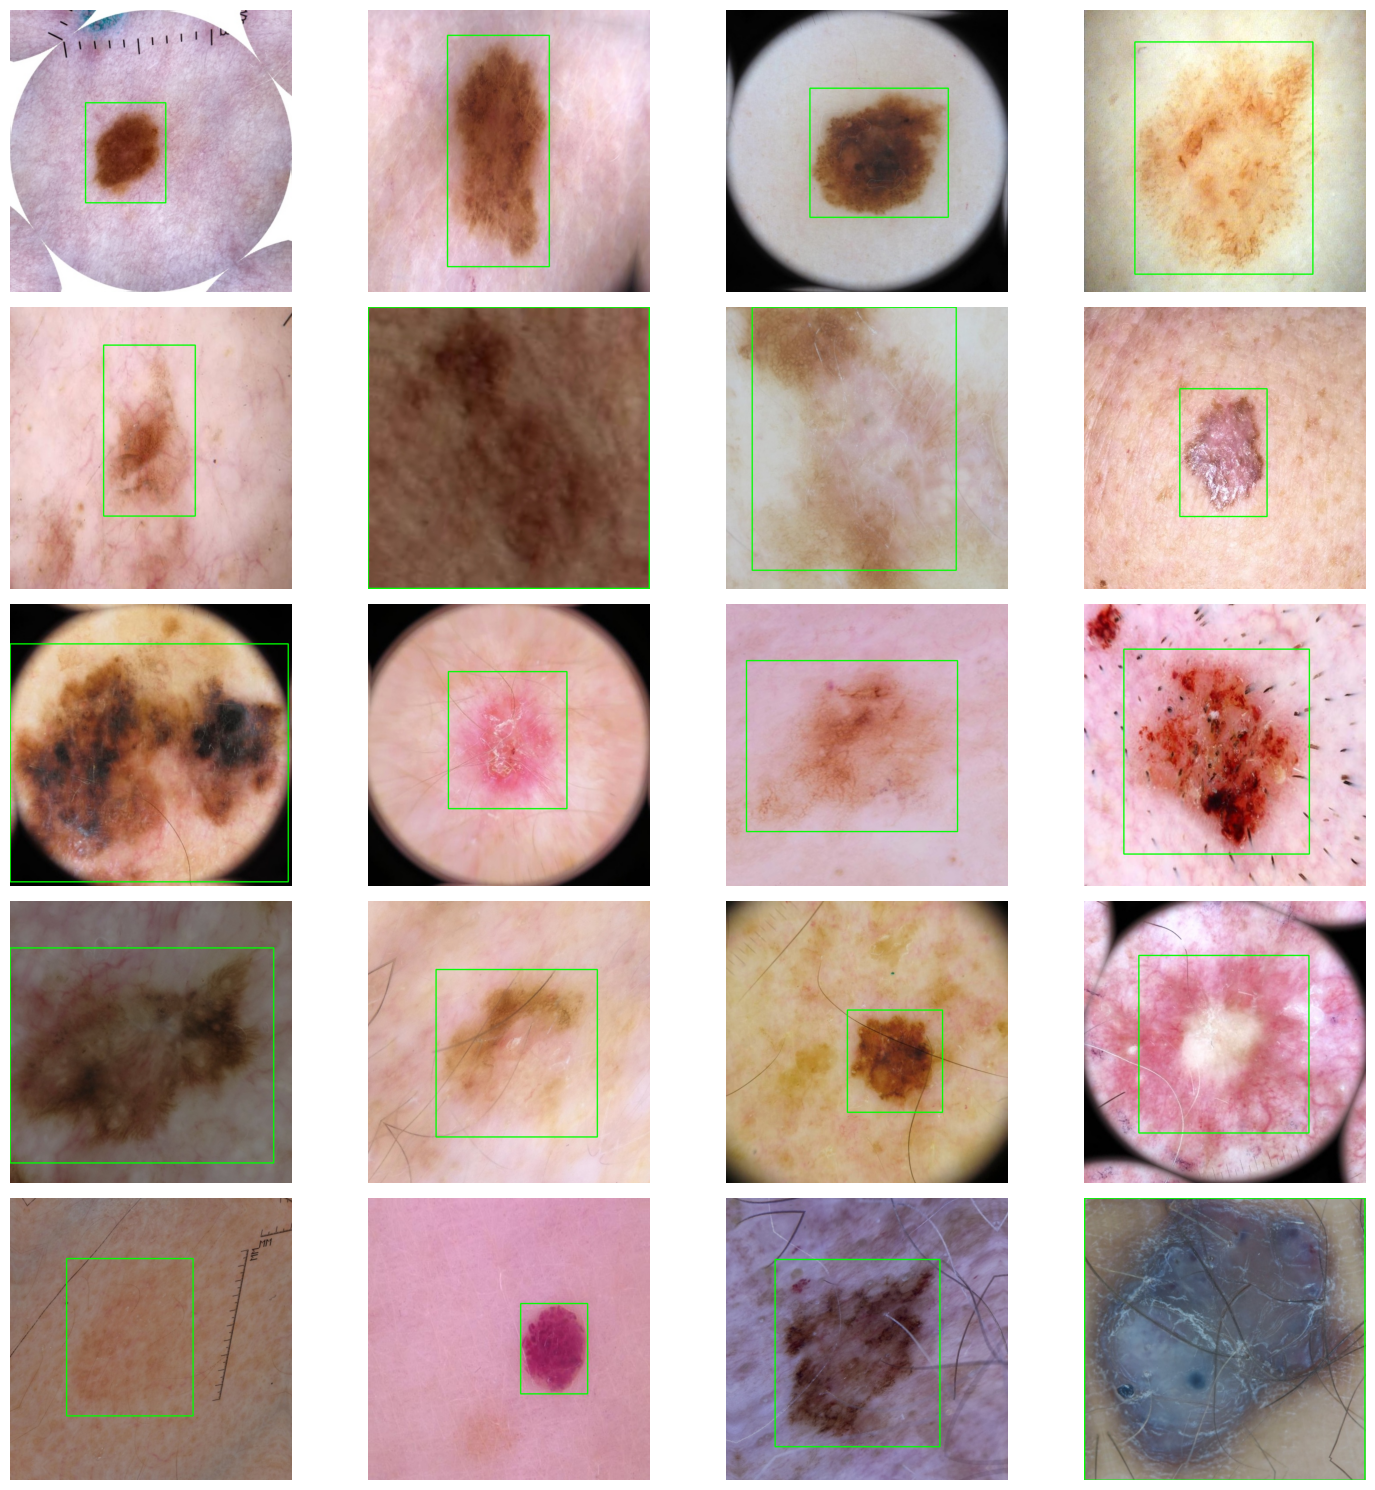

In [ ]:
"""untuk menampilkan dataset"""

import os
import random
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk membaca bounding box dari file YOLO format
def read_yolo_labels(label_file, img_w, img_h):
    boxes = []
    with open(label_file, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
            x_center = int(x_center * img_w)
            y_center = int(y_center * img_h)
            bbox_width = int(bbox_width * img_w)
            bbox_height = int(bbox_height * img_h)
            x1 = int(x_center - bbox_width / 2)
            y1 = int(y_center - bbox_height / 2)
            x2 = int(x_center + bbox_width / 2)
            y2 = int(y_center + bbox_height / 2)
            boxes.append((x1, y1, x2, y2))
    return boxes

# Fungsi untuk menampilkan gambar beserta bounding box-nya
def display_image_with_boxes(ax, image_path, label_path):
    img = cv2.imread(image_path)
    img_h, img_w, _ = img.shape

    # Baca bounding box dari file label
    boxes = read_yolo_labels(label_path, img_w, img_h)

    # Gambarkan bounding box di gambar
    for box in boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Kotak hijau

    # Ubah BGR ke RGB untuk matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar
    ax.imshow(img_rgb)
    ax.axis('off')  # Hilangkan axis

# Fungsi untuk memilih secara acak 20 gambar dari folder dataset
def show_random_images_with_boxes(dataset_dir, num_images=20):
    # List semua folder: train, valid, test
    subsets = ['train', 'valid', 'test']

    # List semua file gambar
    image_paths = []
    for subset in subsets:
        image_dir = os.path.join(dataset_dir, subset, 'images')
        label_dir = os.path.join(dataset_dir, subset, 'labels')
        for image_file in os.listdir(image_dir):
            image_paths.append((os.path.join(image_dir, image_file), os.path.join(label_dir, image_file.replace('.jpg', '.txt'))))

    # Ambil 20 gambar secara acak
    random_images = random.sample(image_paths, num_images)

    # Setup figure dan axis untuk grid 4 kolom dan 5 baris
    fig, axs = plt.subplots(5, 4, figsize=(15, 15))  # 5 baris, 4 kolom

    axs = axs.ravel()  # Flatten axes menjadi list

    # Tampilkan setiap gambar dengan bounding box
    for i, (image_path, label_path) in enumerate(random_images):
        display_image_with_boxes(axs[i], image_path, label_path)

    plt.tight_layout()
    plt.show()

# Jalankan fungsi
dataset_dir = 'datasets'  # Ganti dengan path ke dataset-mu
show_random_images_with_boxes(dataset_dir)


## Training

In [ ]:
%cd {HOME}
!yolo task=detect mode=train data=data.yaml model=yolov8m.pt epochs=50 imgsz=640

/content
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

In [ ]:
!ls {HOME}/runs/detect/train/

F1_curve.png			 labels_correlogram.jpg  train_batch63727.jpg
PR_curve.png			 results.csv		 val_batch0_labels.jpg
P_curve.png			 results.png		 val_batch0_pred.jpg
R_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch63725.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch63726.jpg	 weights


/Athaya


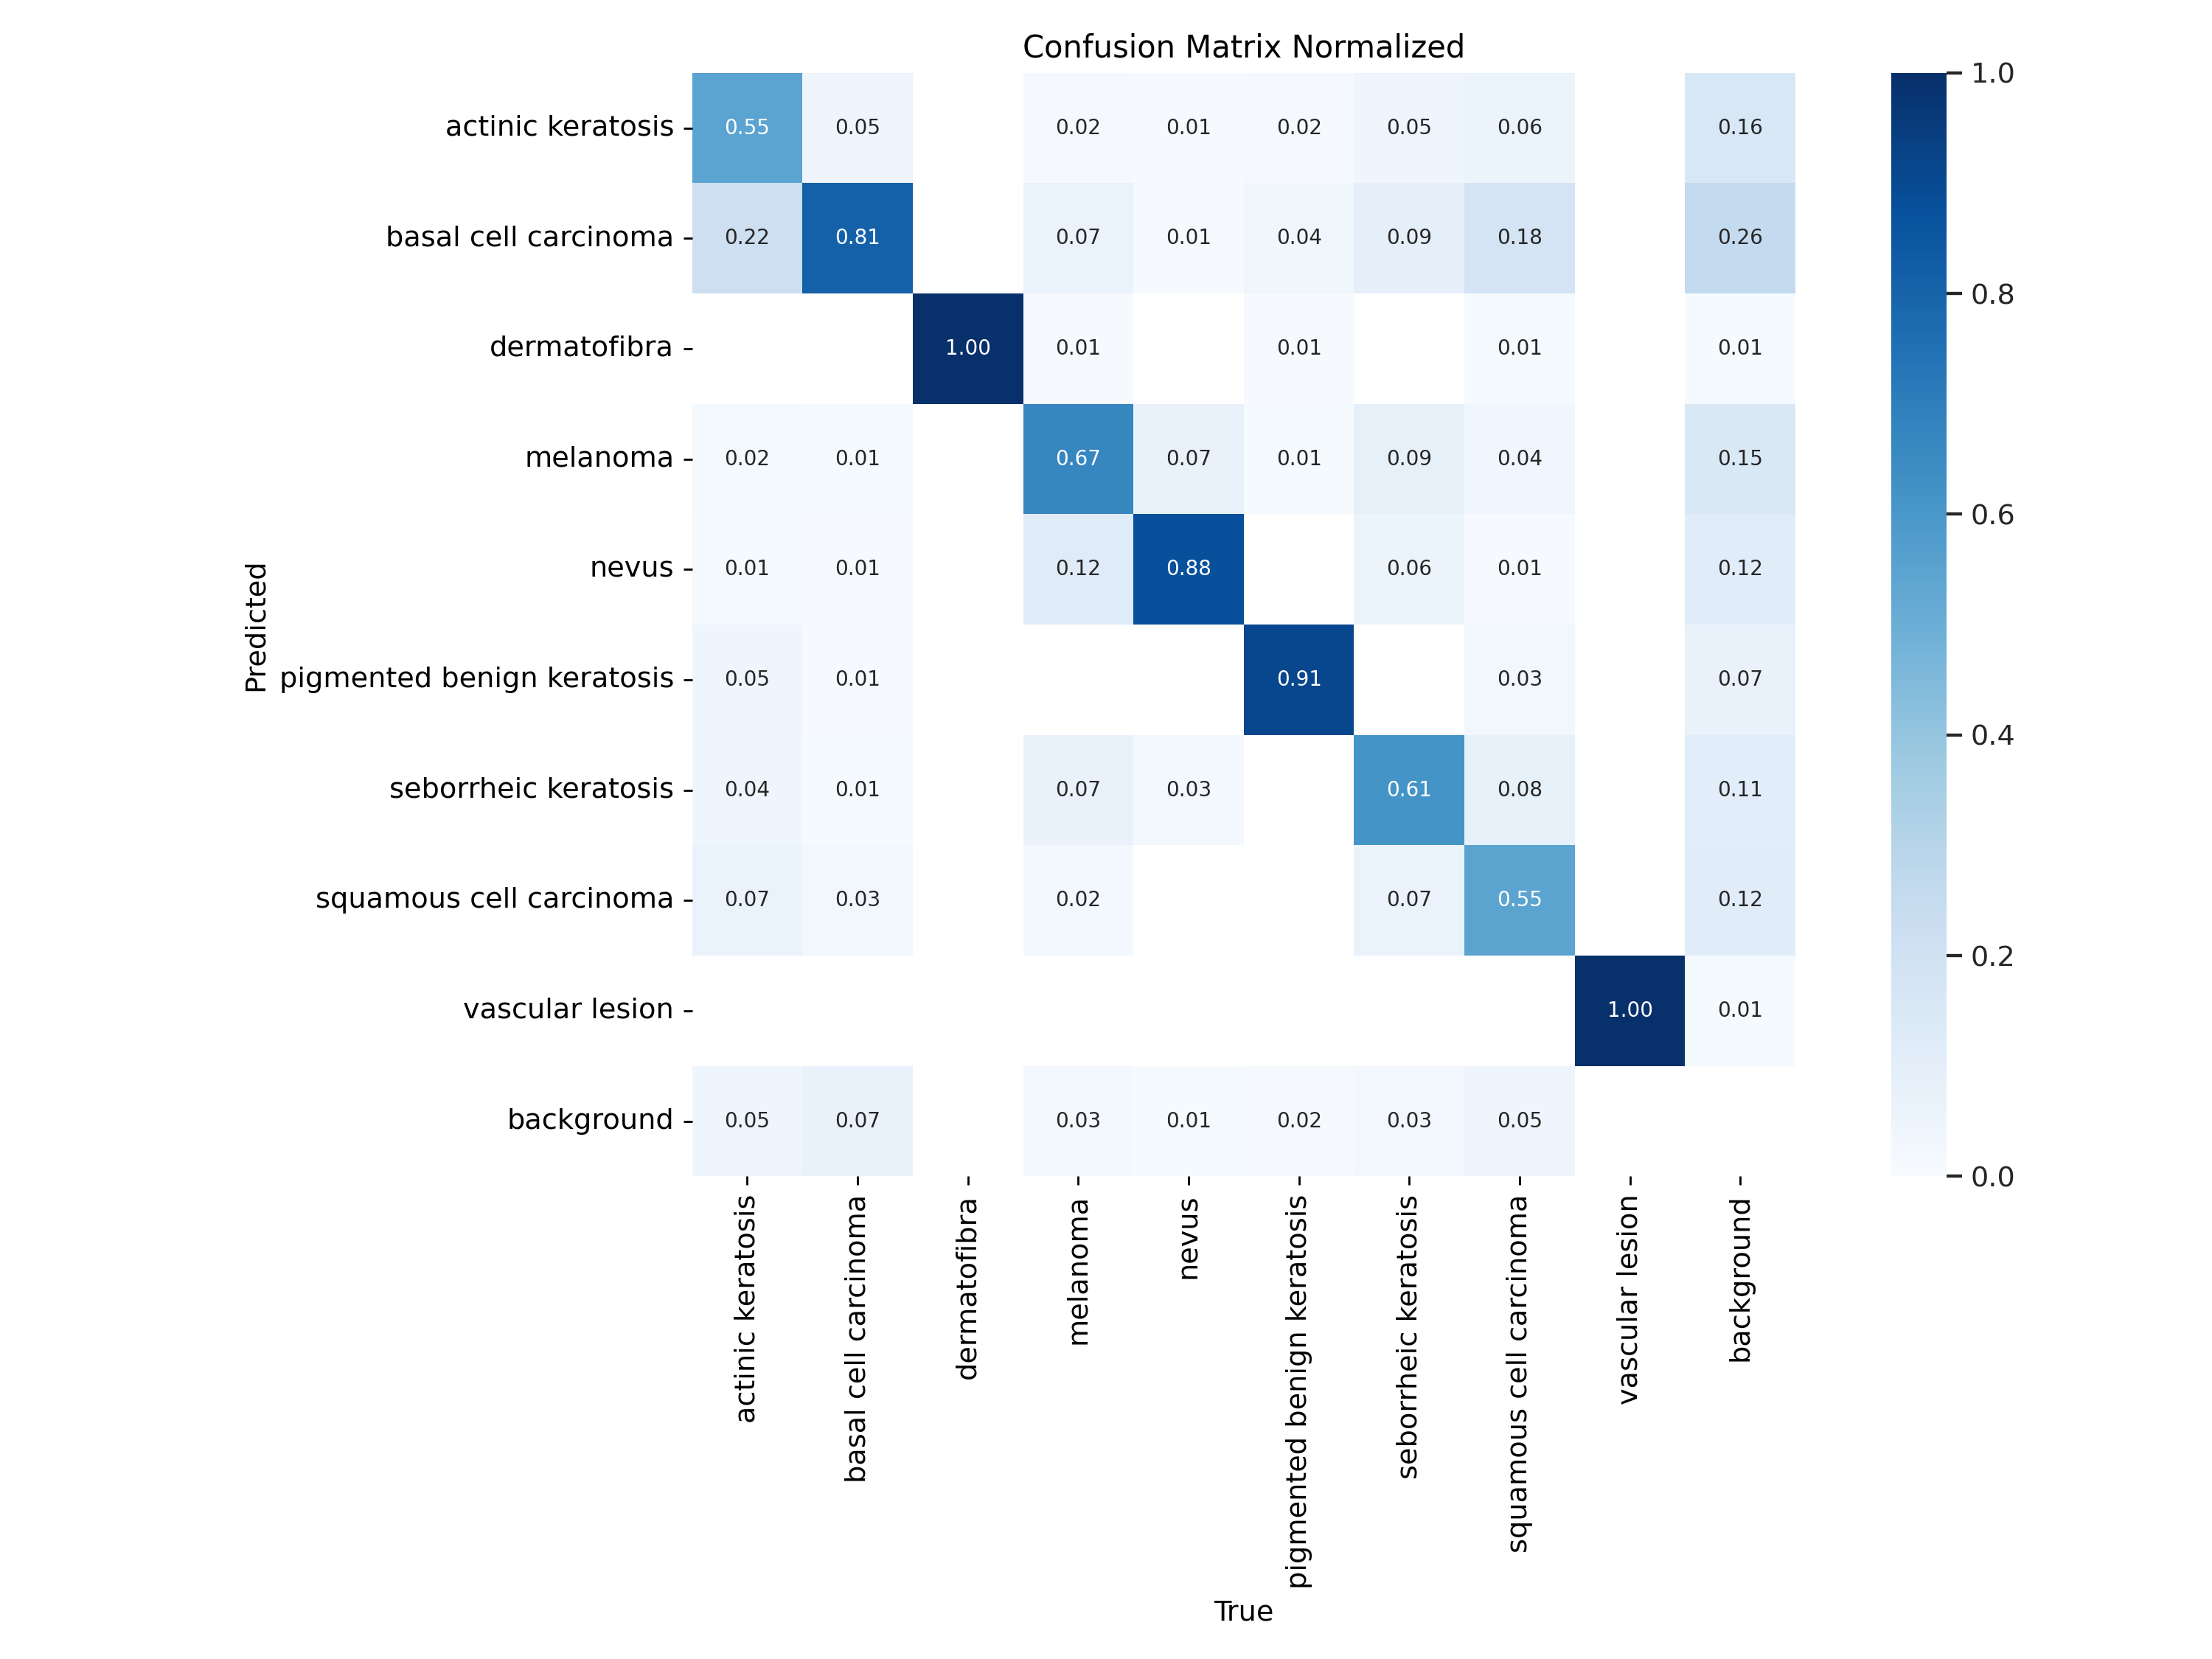

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

/Athaya


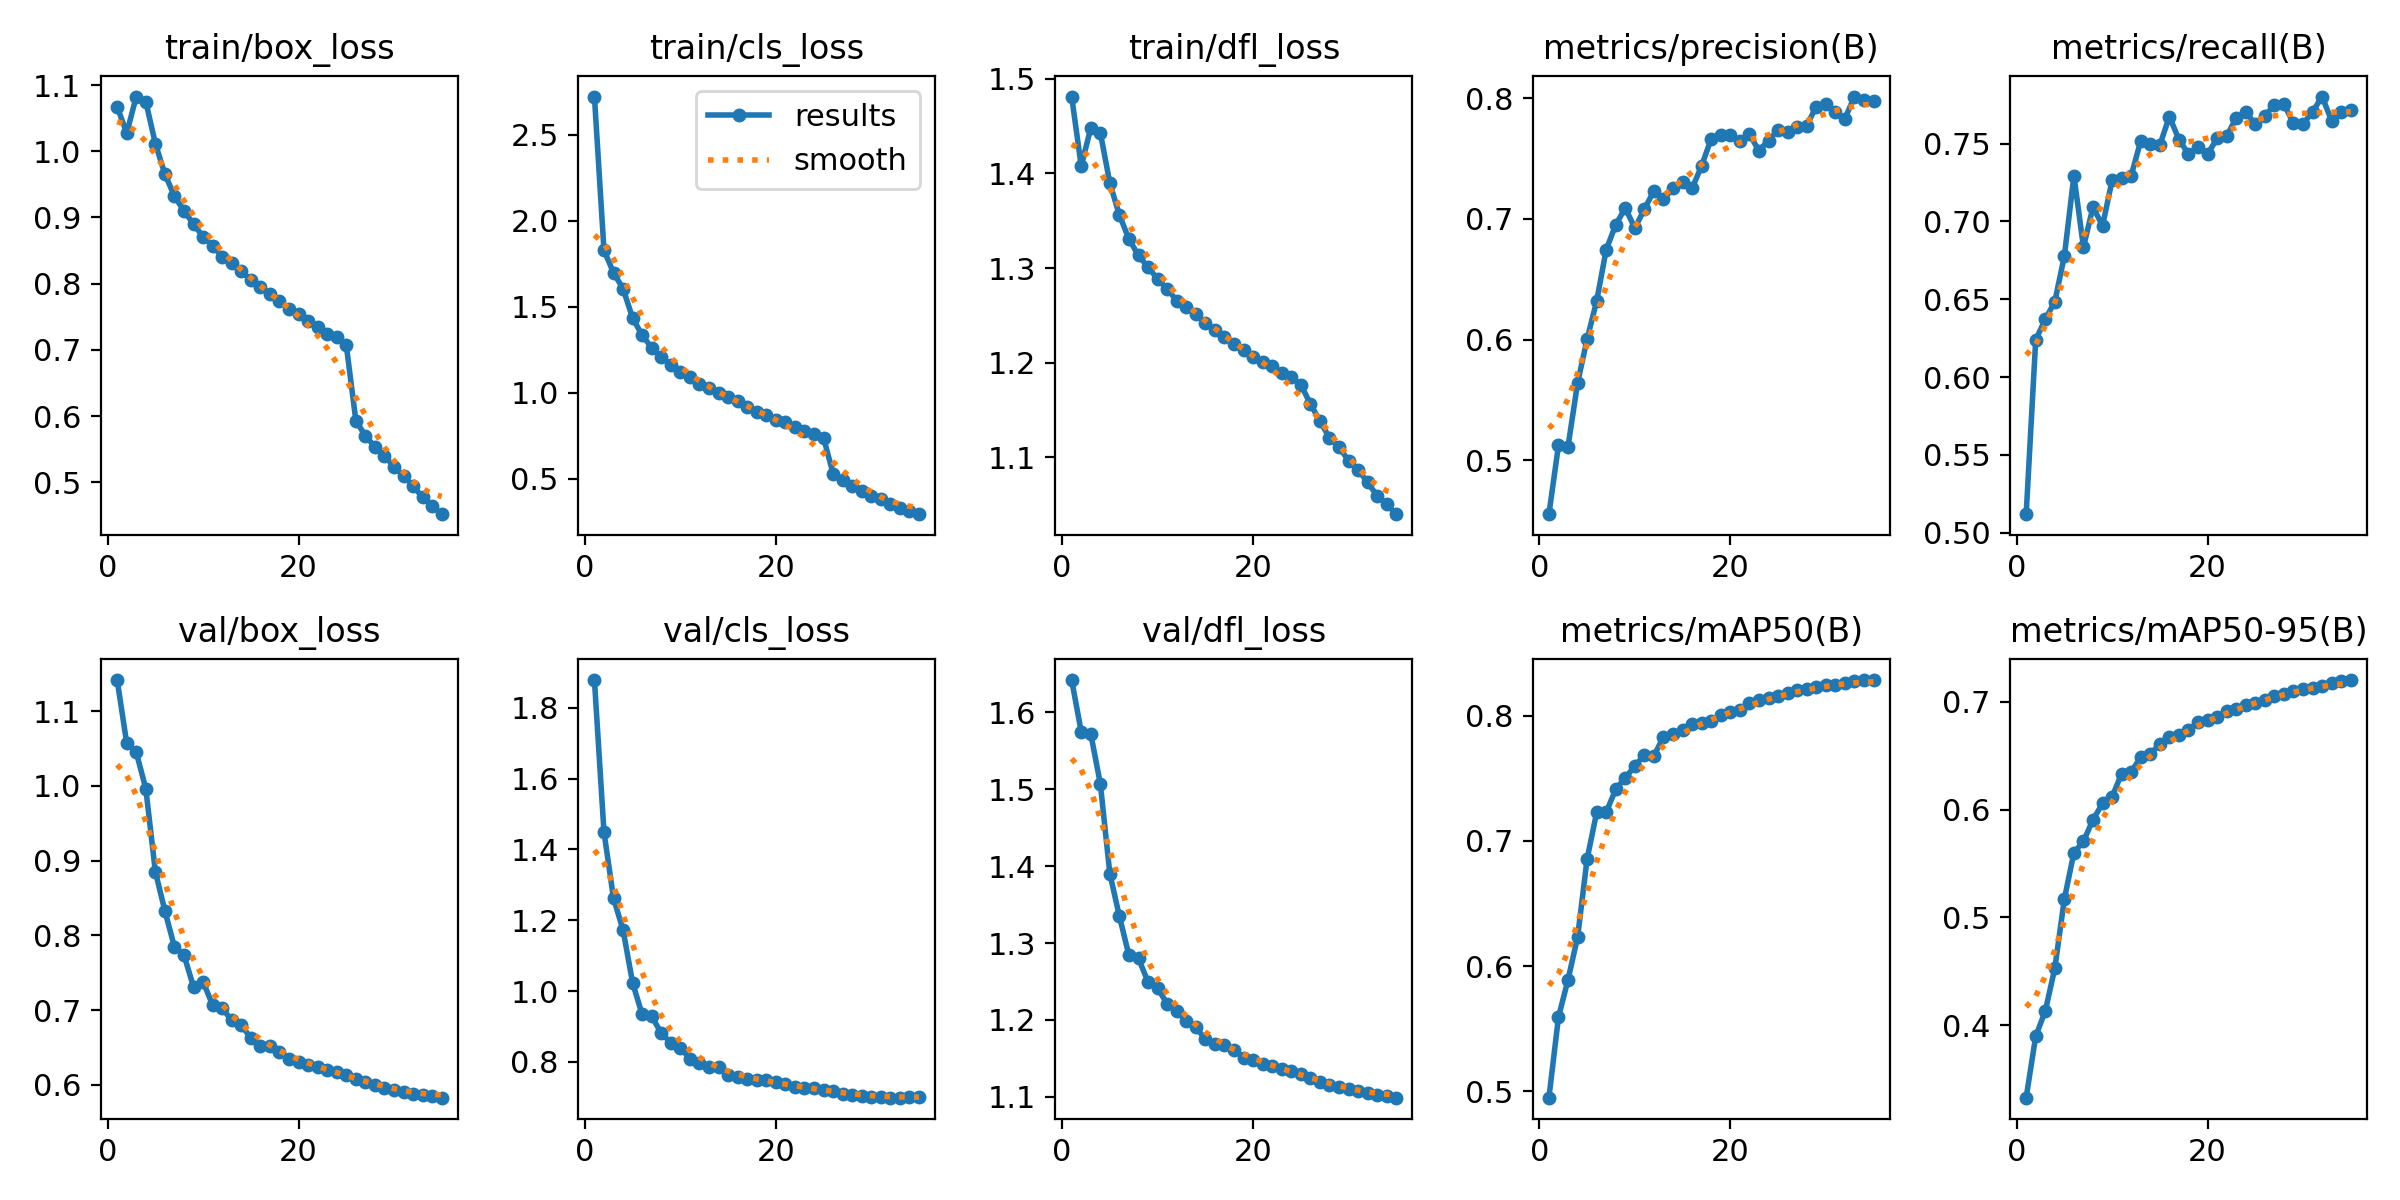

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/Athaya


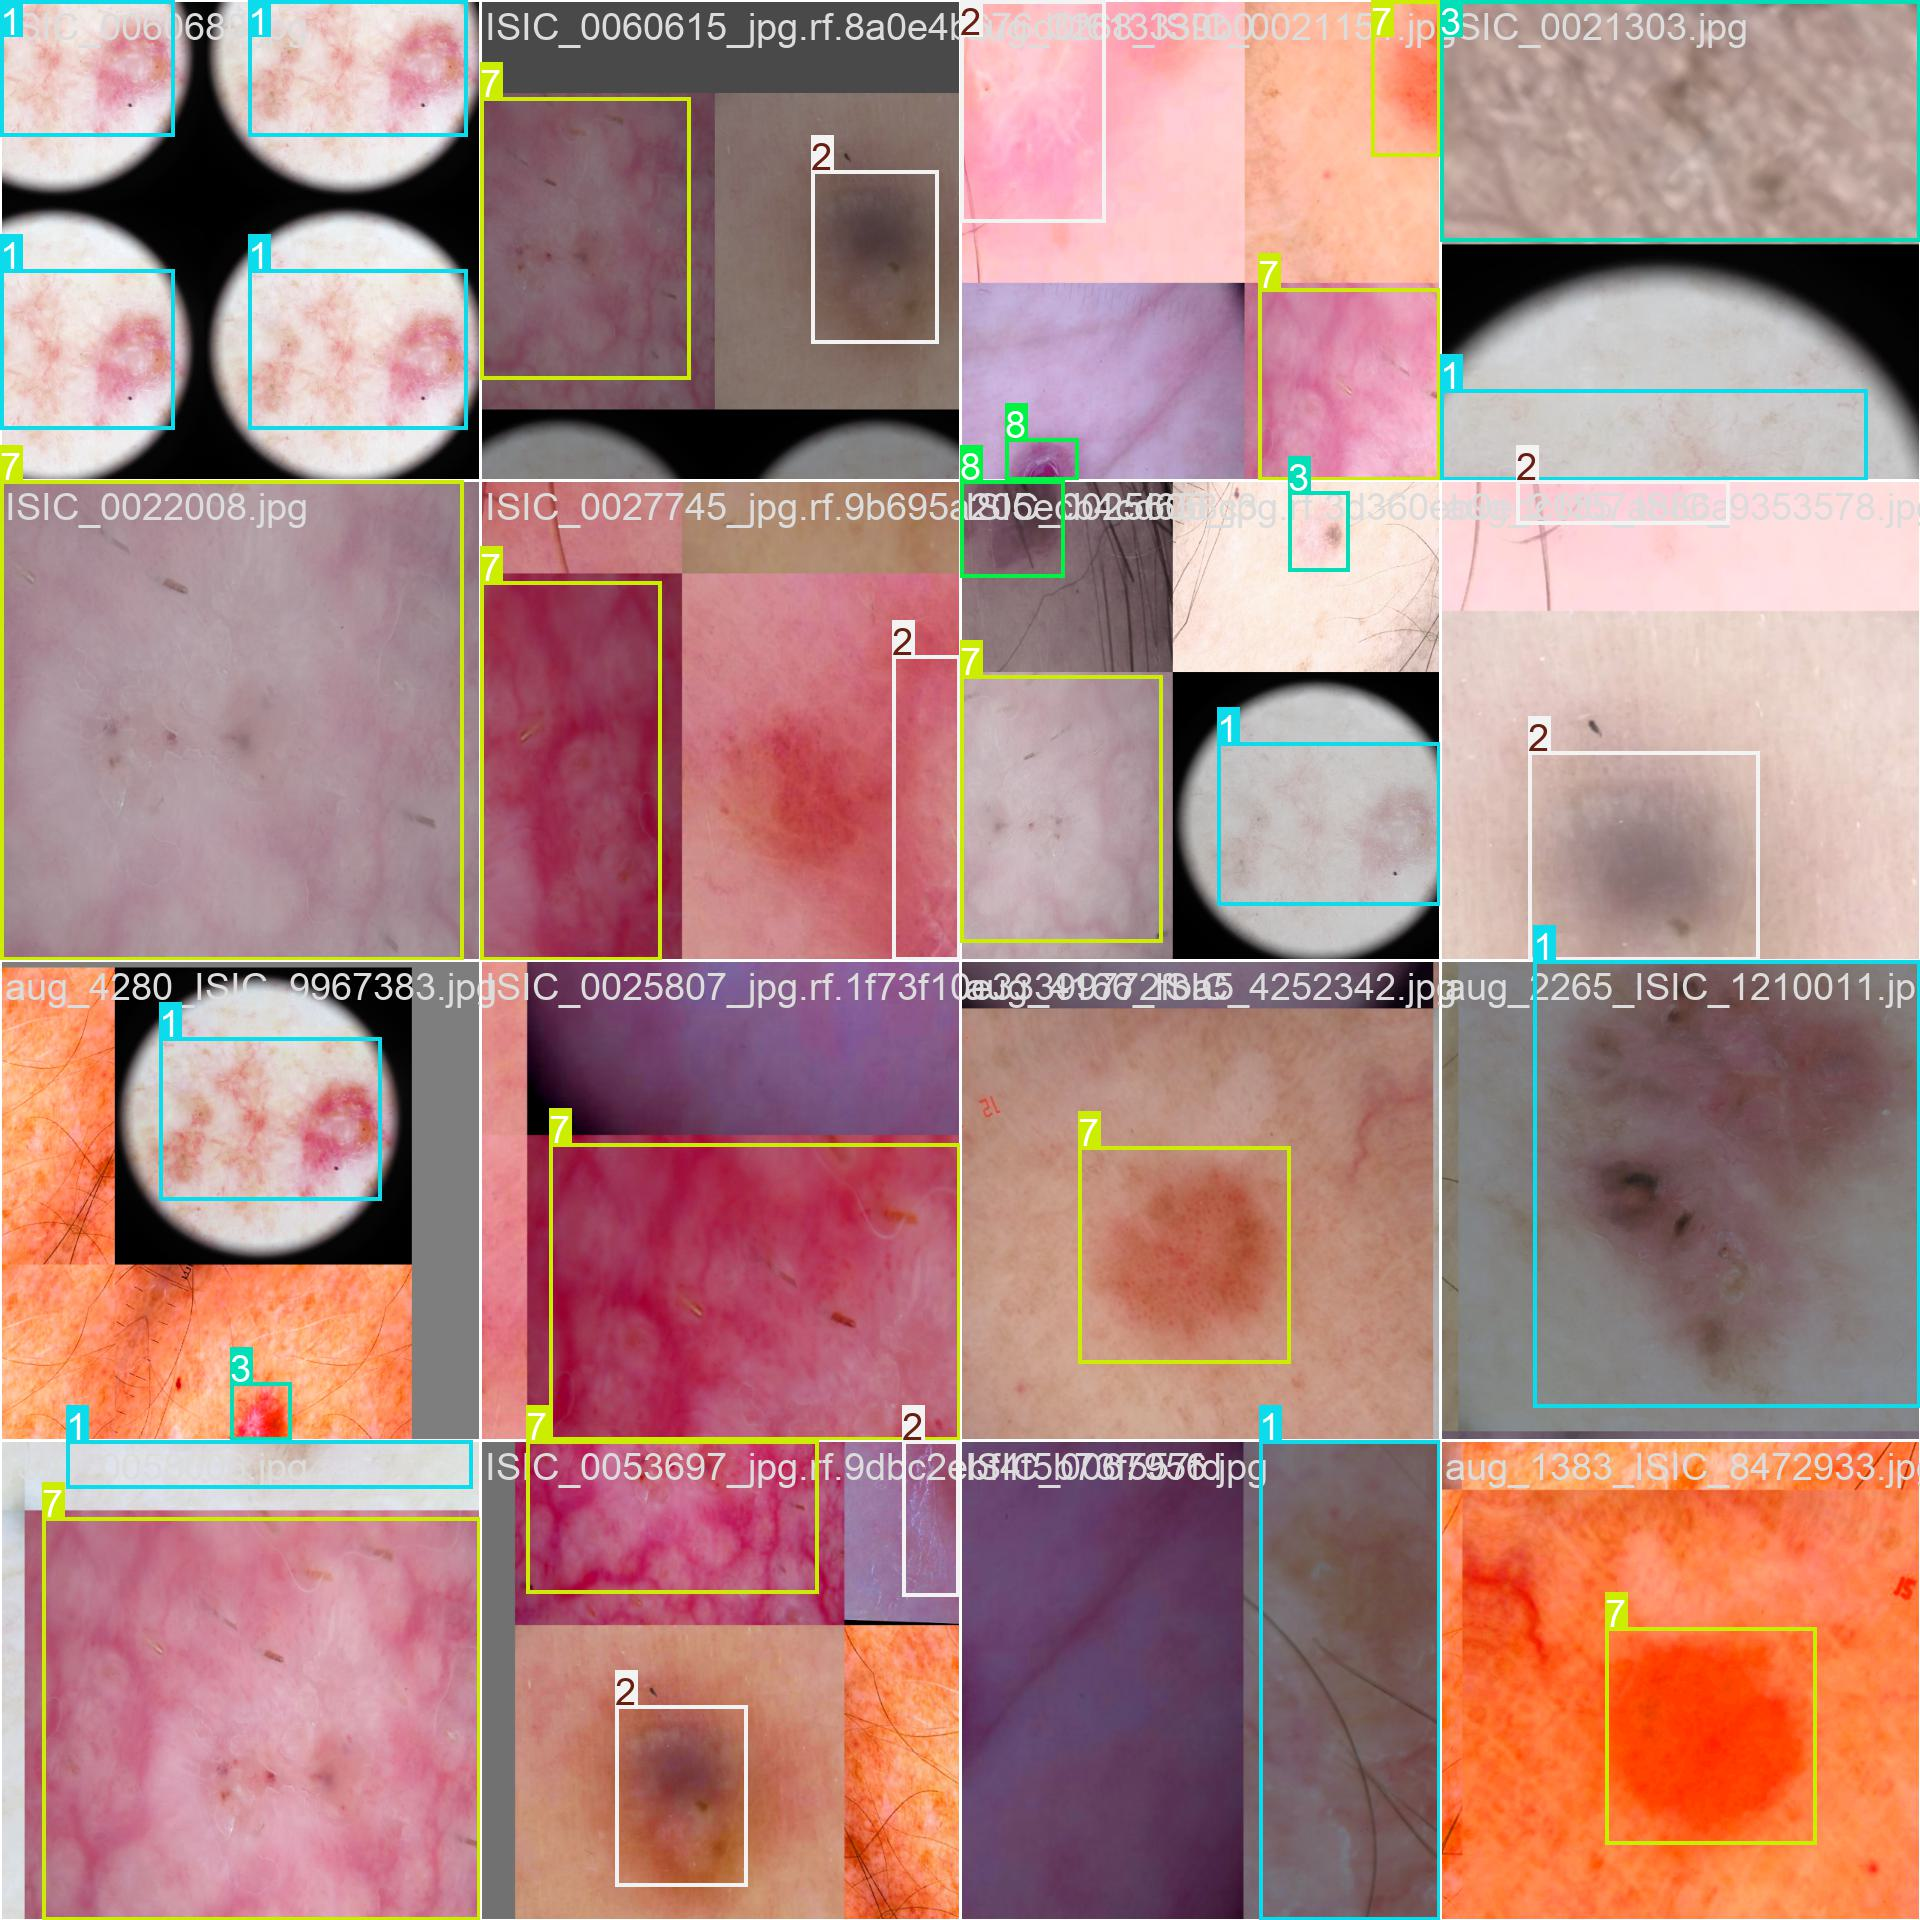

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

/Athaya


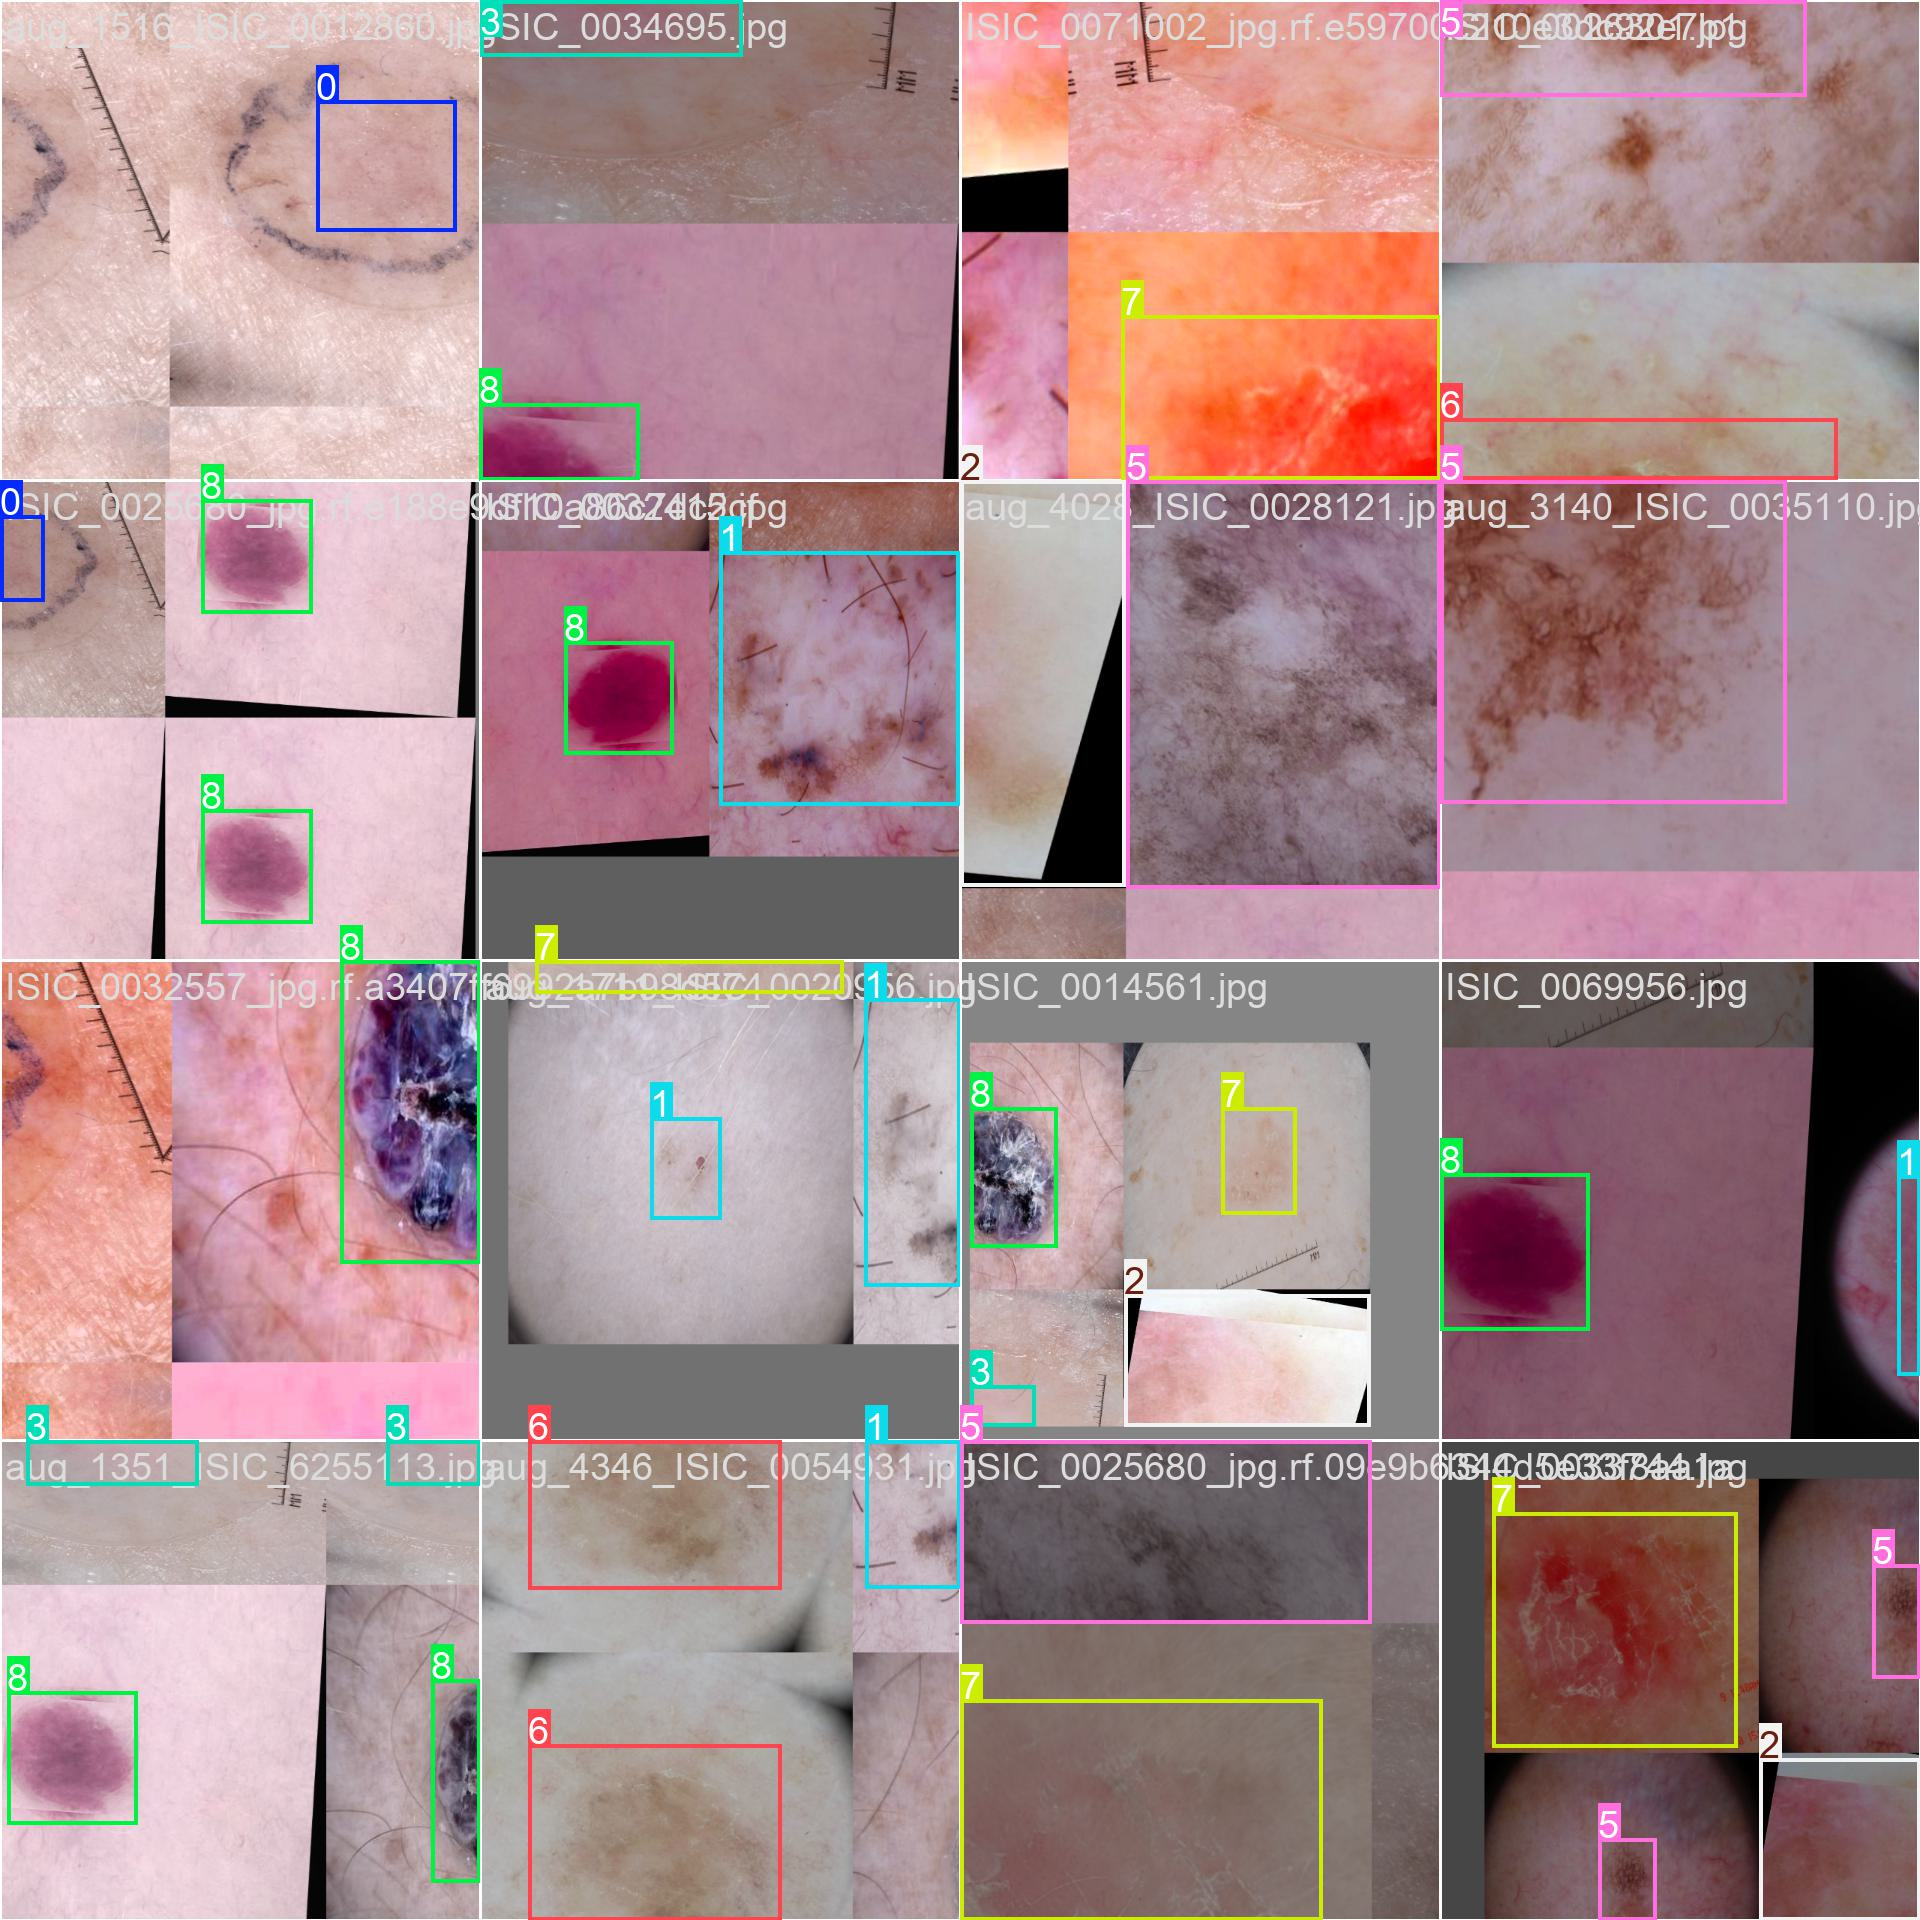

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=600)

## Validating

In [14]:
%cd {HOME}

!yolo task=detect mode=val model=last.pt data=data.yaml

/content
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/valid/labels... 1607 images, 0 backgrounds, 0 corrupt: 100% 1607/1607 [00:00<00:00, 2173.34it/s]
val: New cache created: /content/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 101/101 [00:44<00:00,  2.26it/s]
                   all       1607       1607      0.887      0.851      0.921       0.85
     actinic keratosis        149        149      0.869      0.792      0.883       0.77
  basal cell carcinoma        166        166      0.865      0.777      0.909      0.806
          dermatofibra        150        150      0.956       0.86      0.954      0.817
              melanoma        139        139      0.781      0.827      0.885      0.831
                 nevus        184        184      0.857      0.912      0.945    

Ground Truth


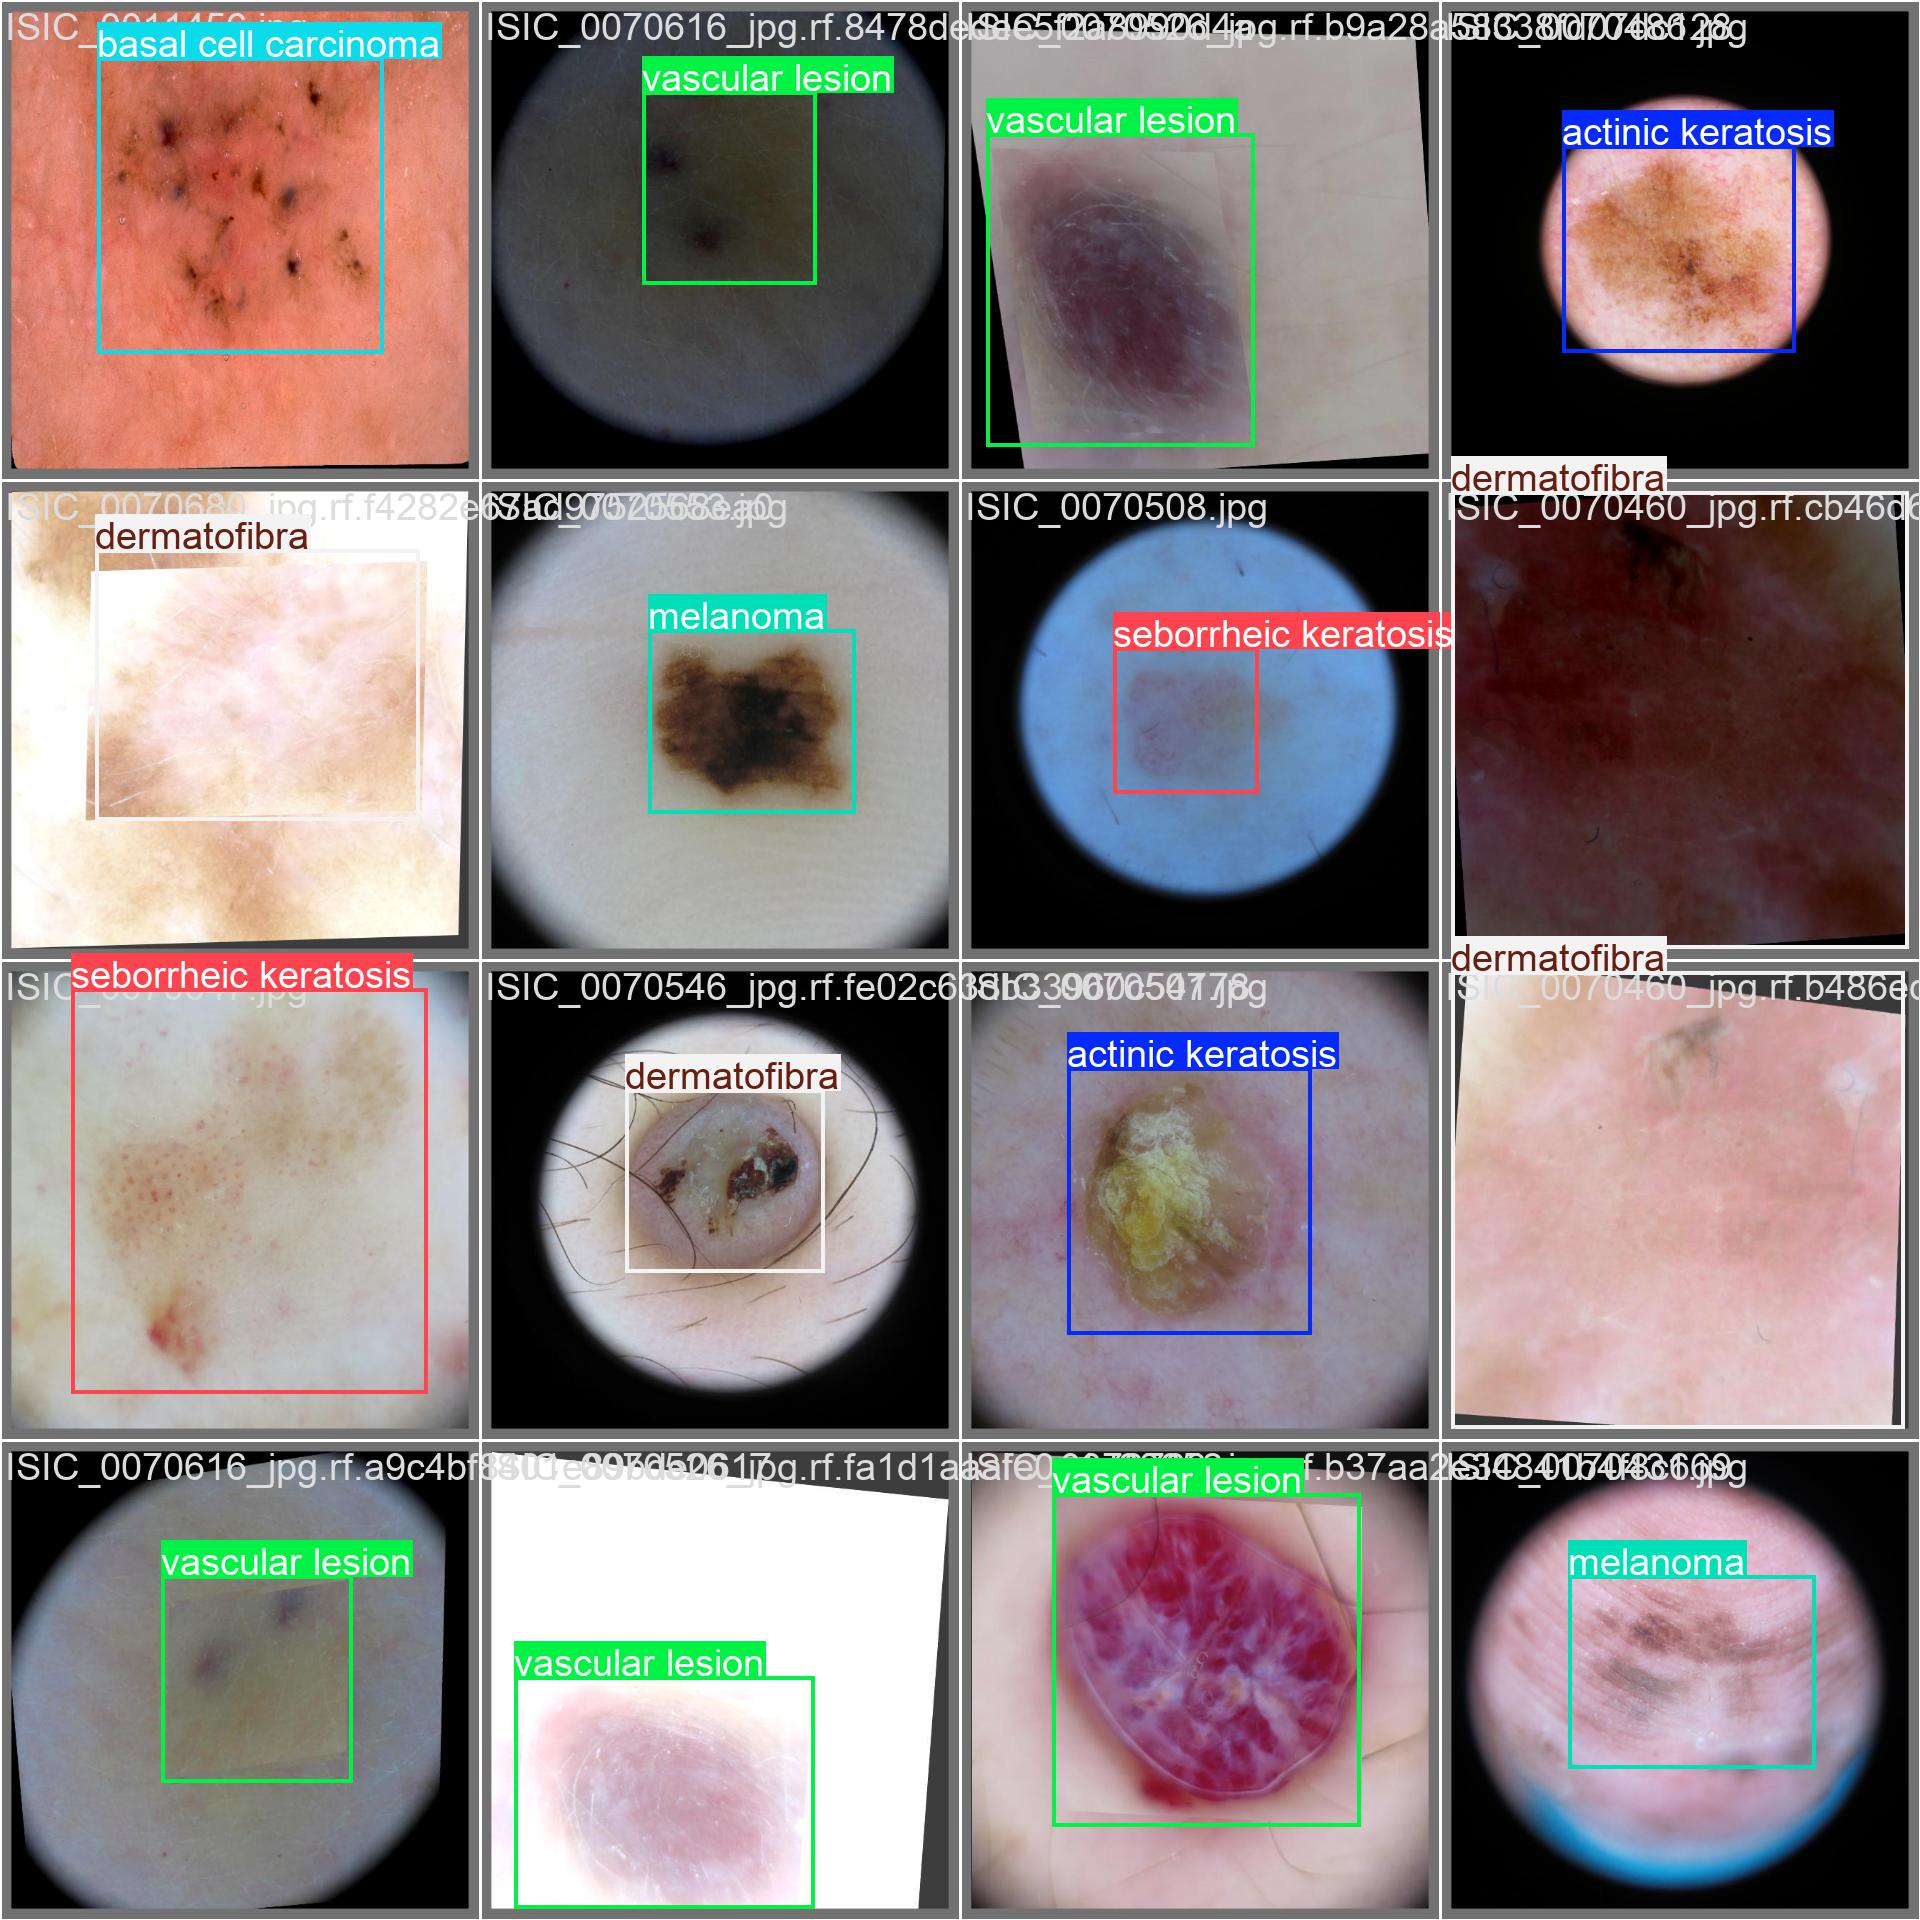


Prediction



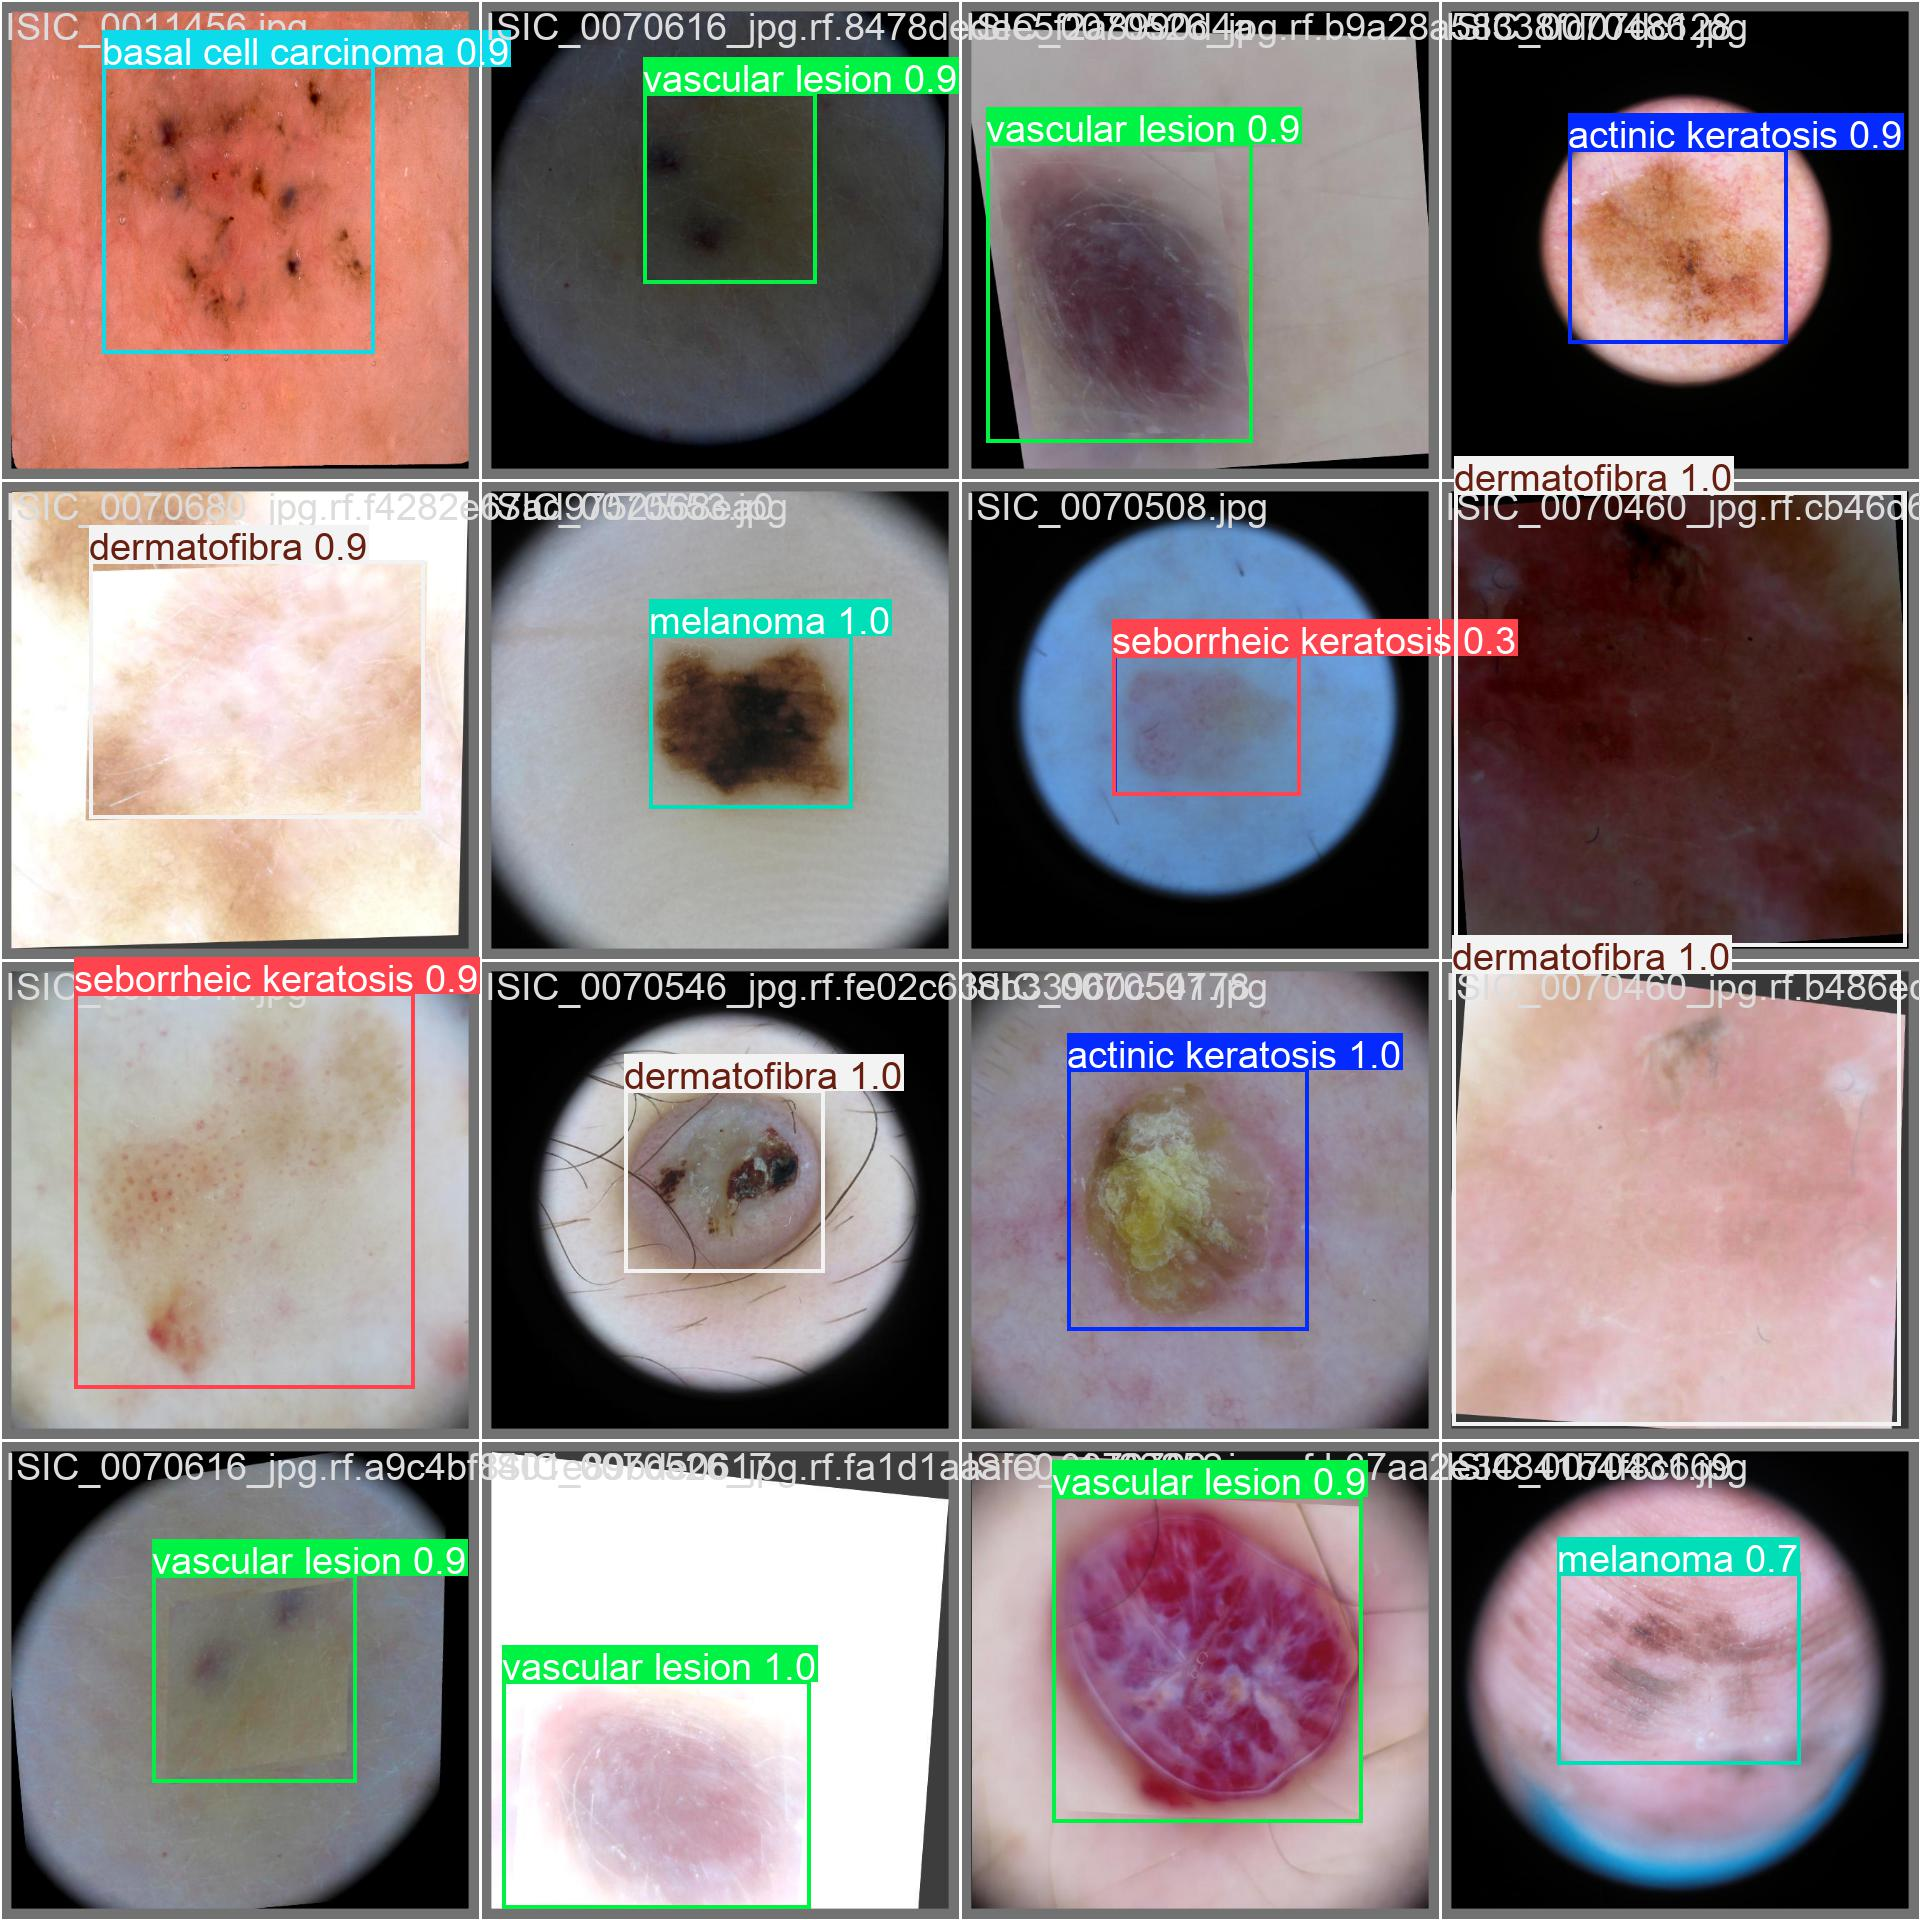

In [ ]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch0_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=500))

Ground Truth


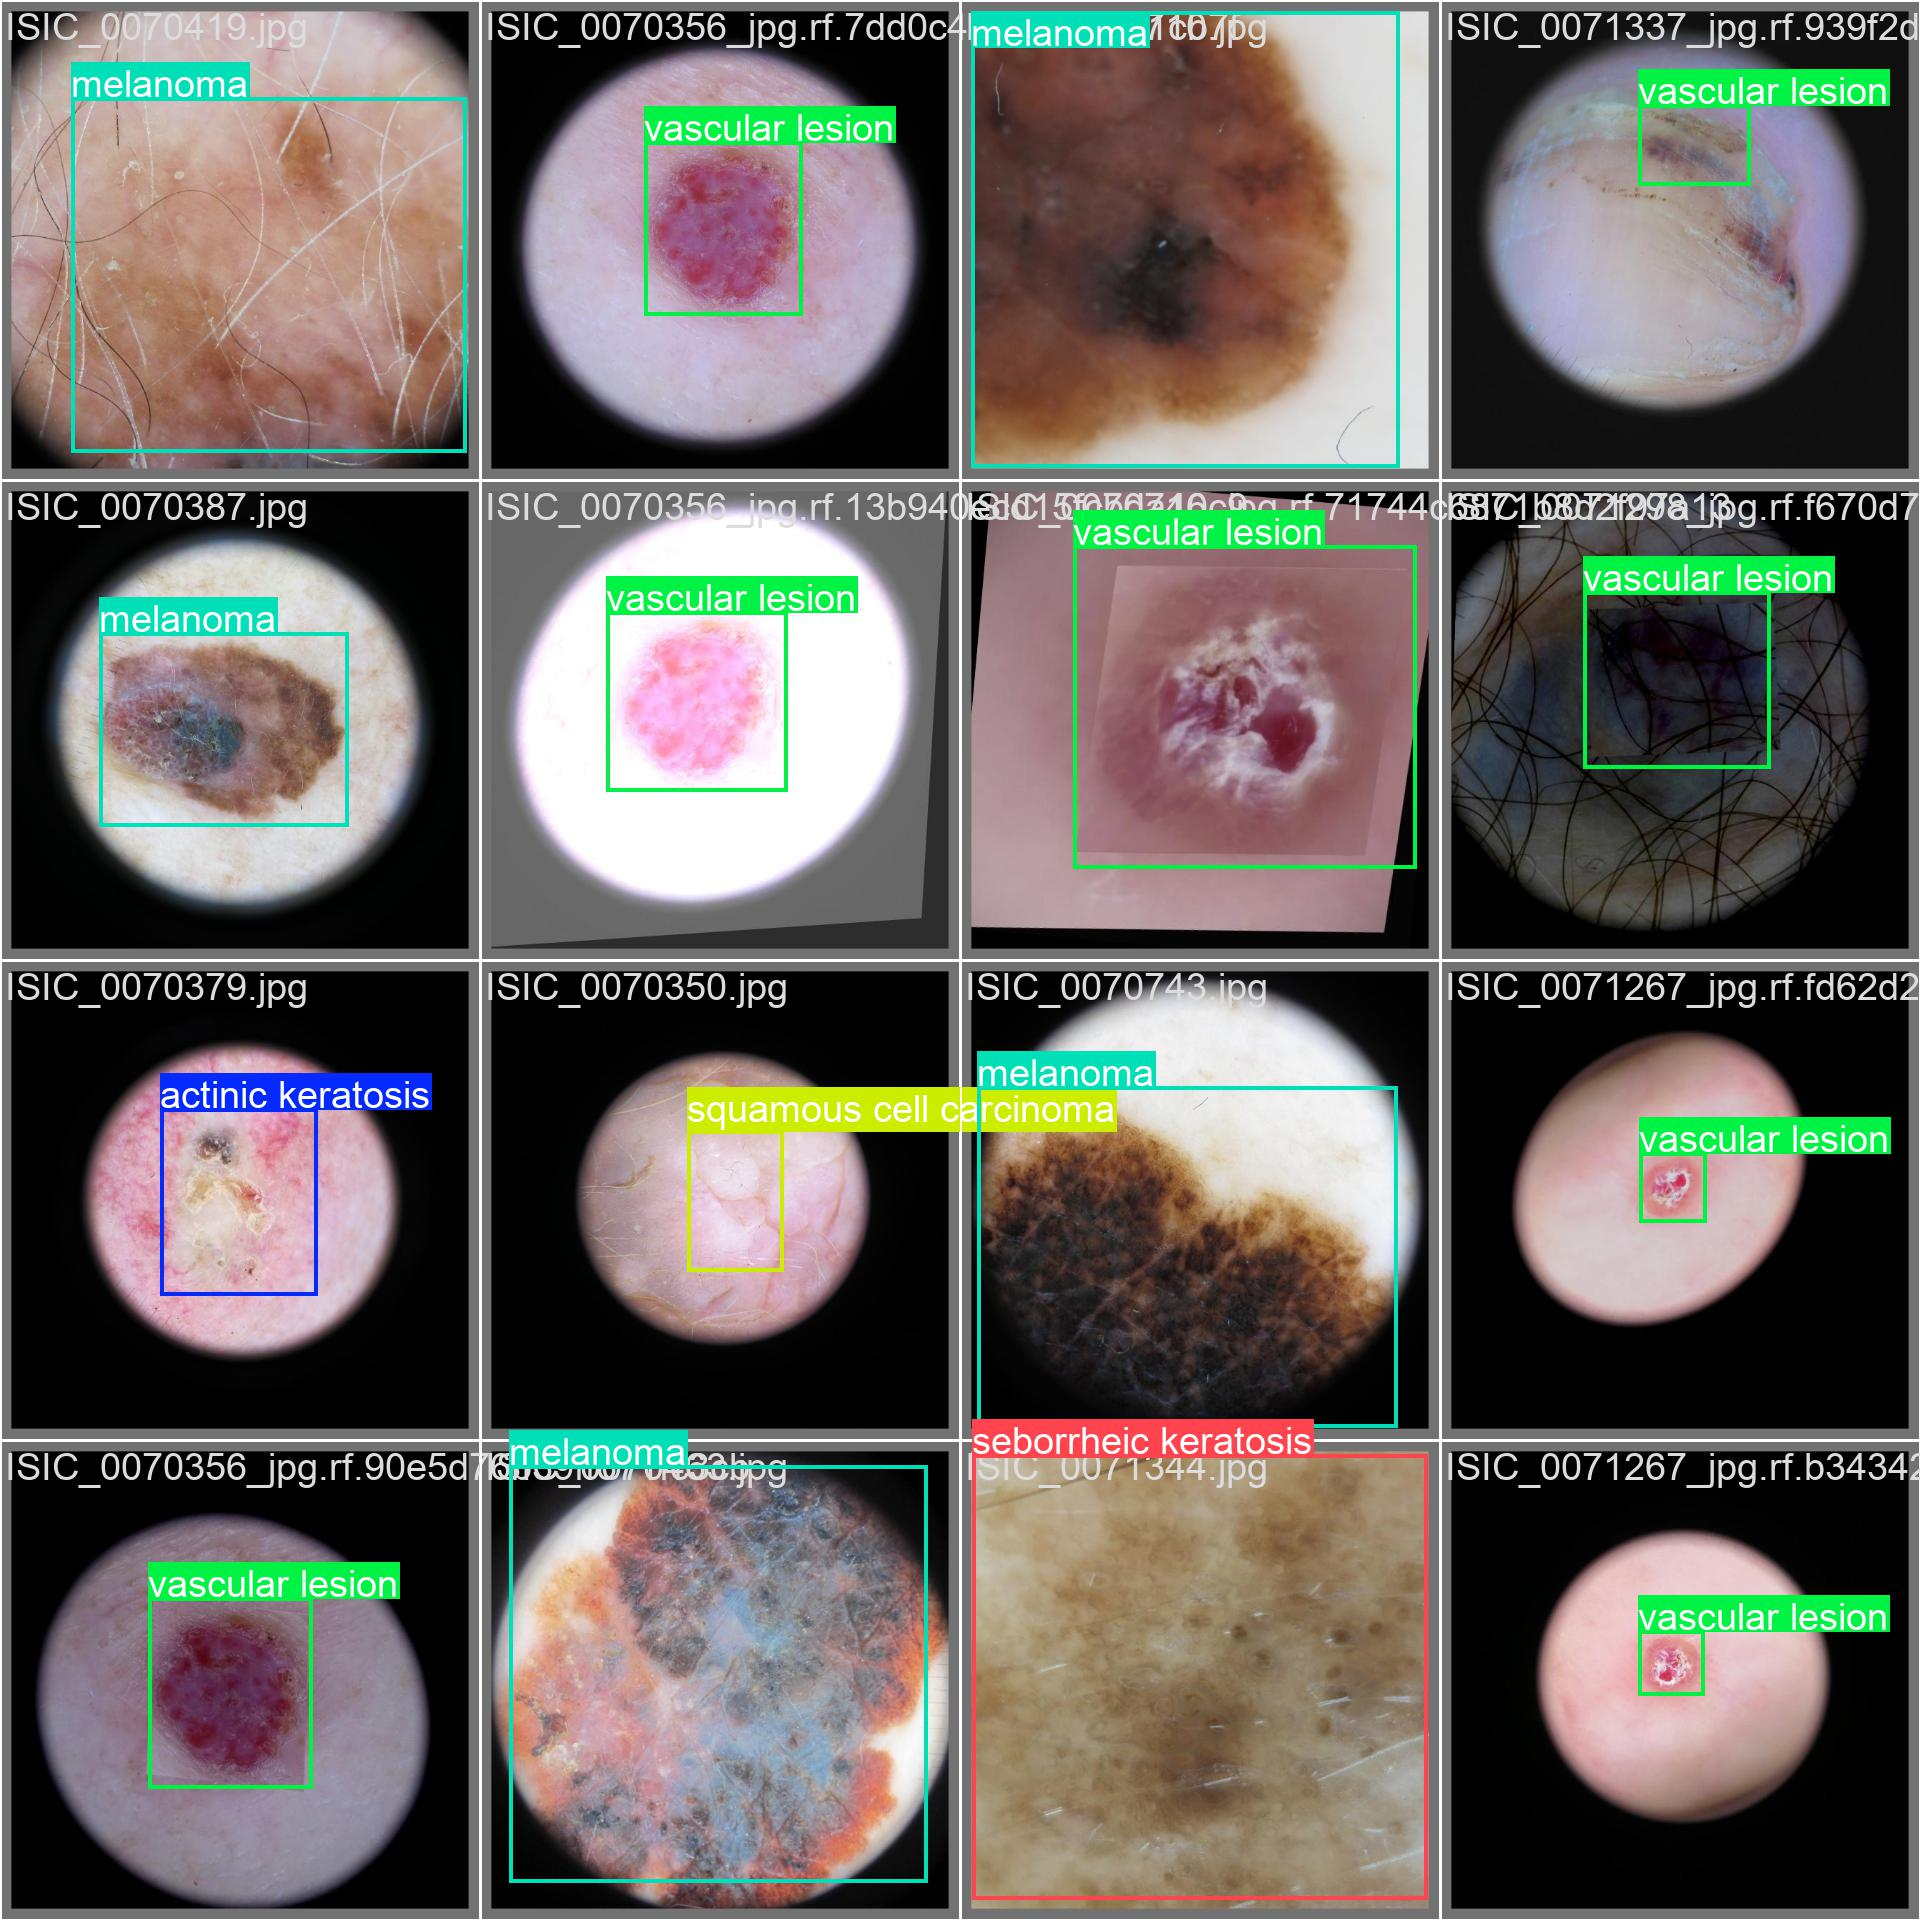


Prediction



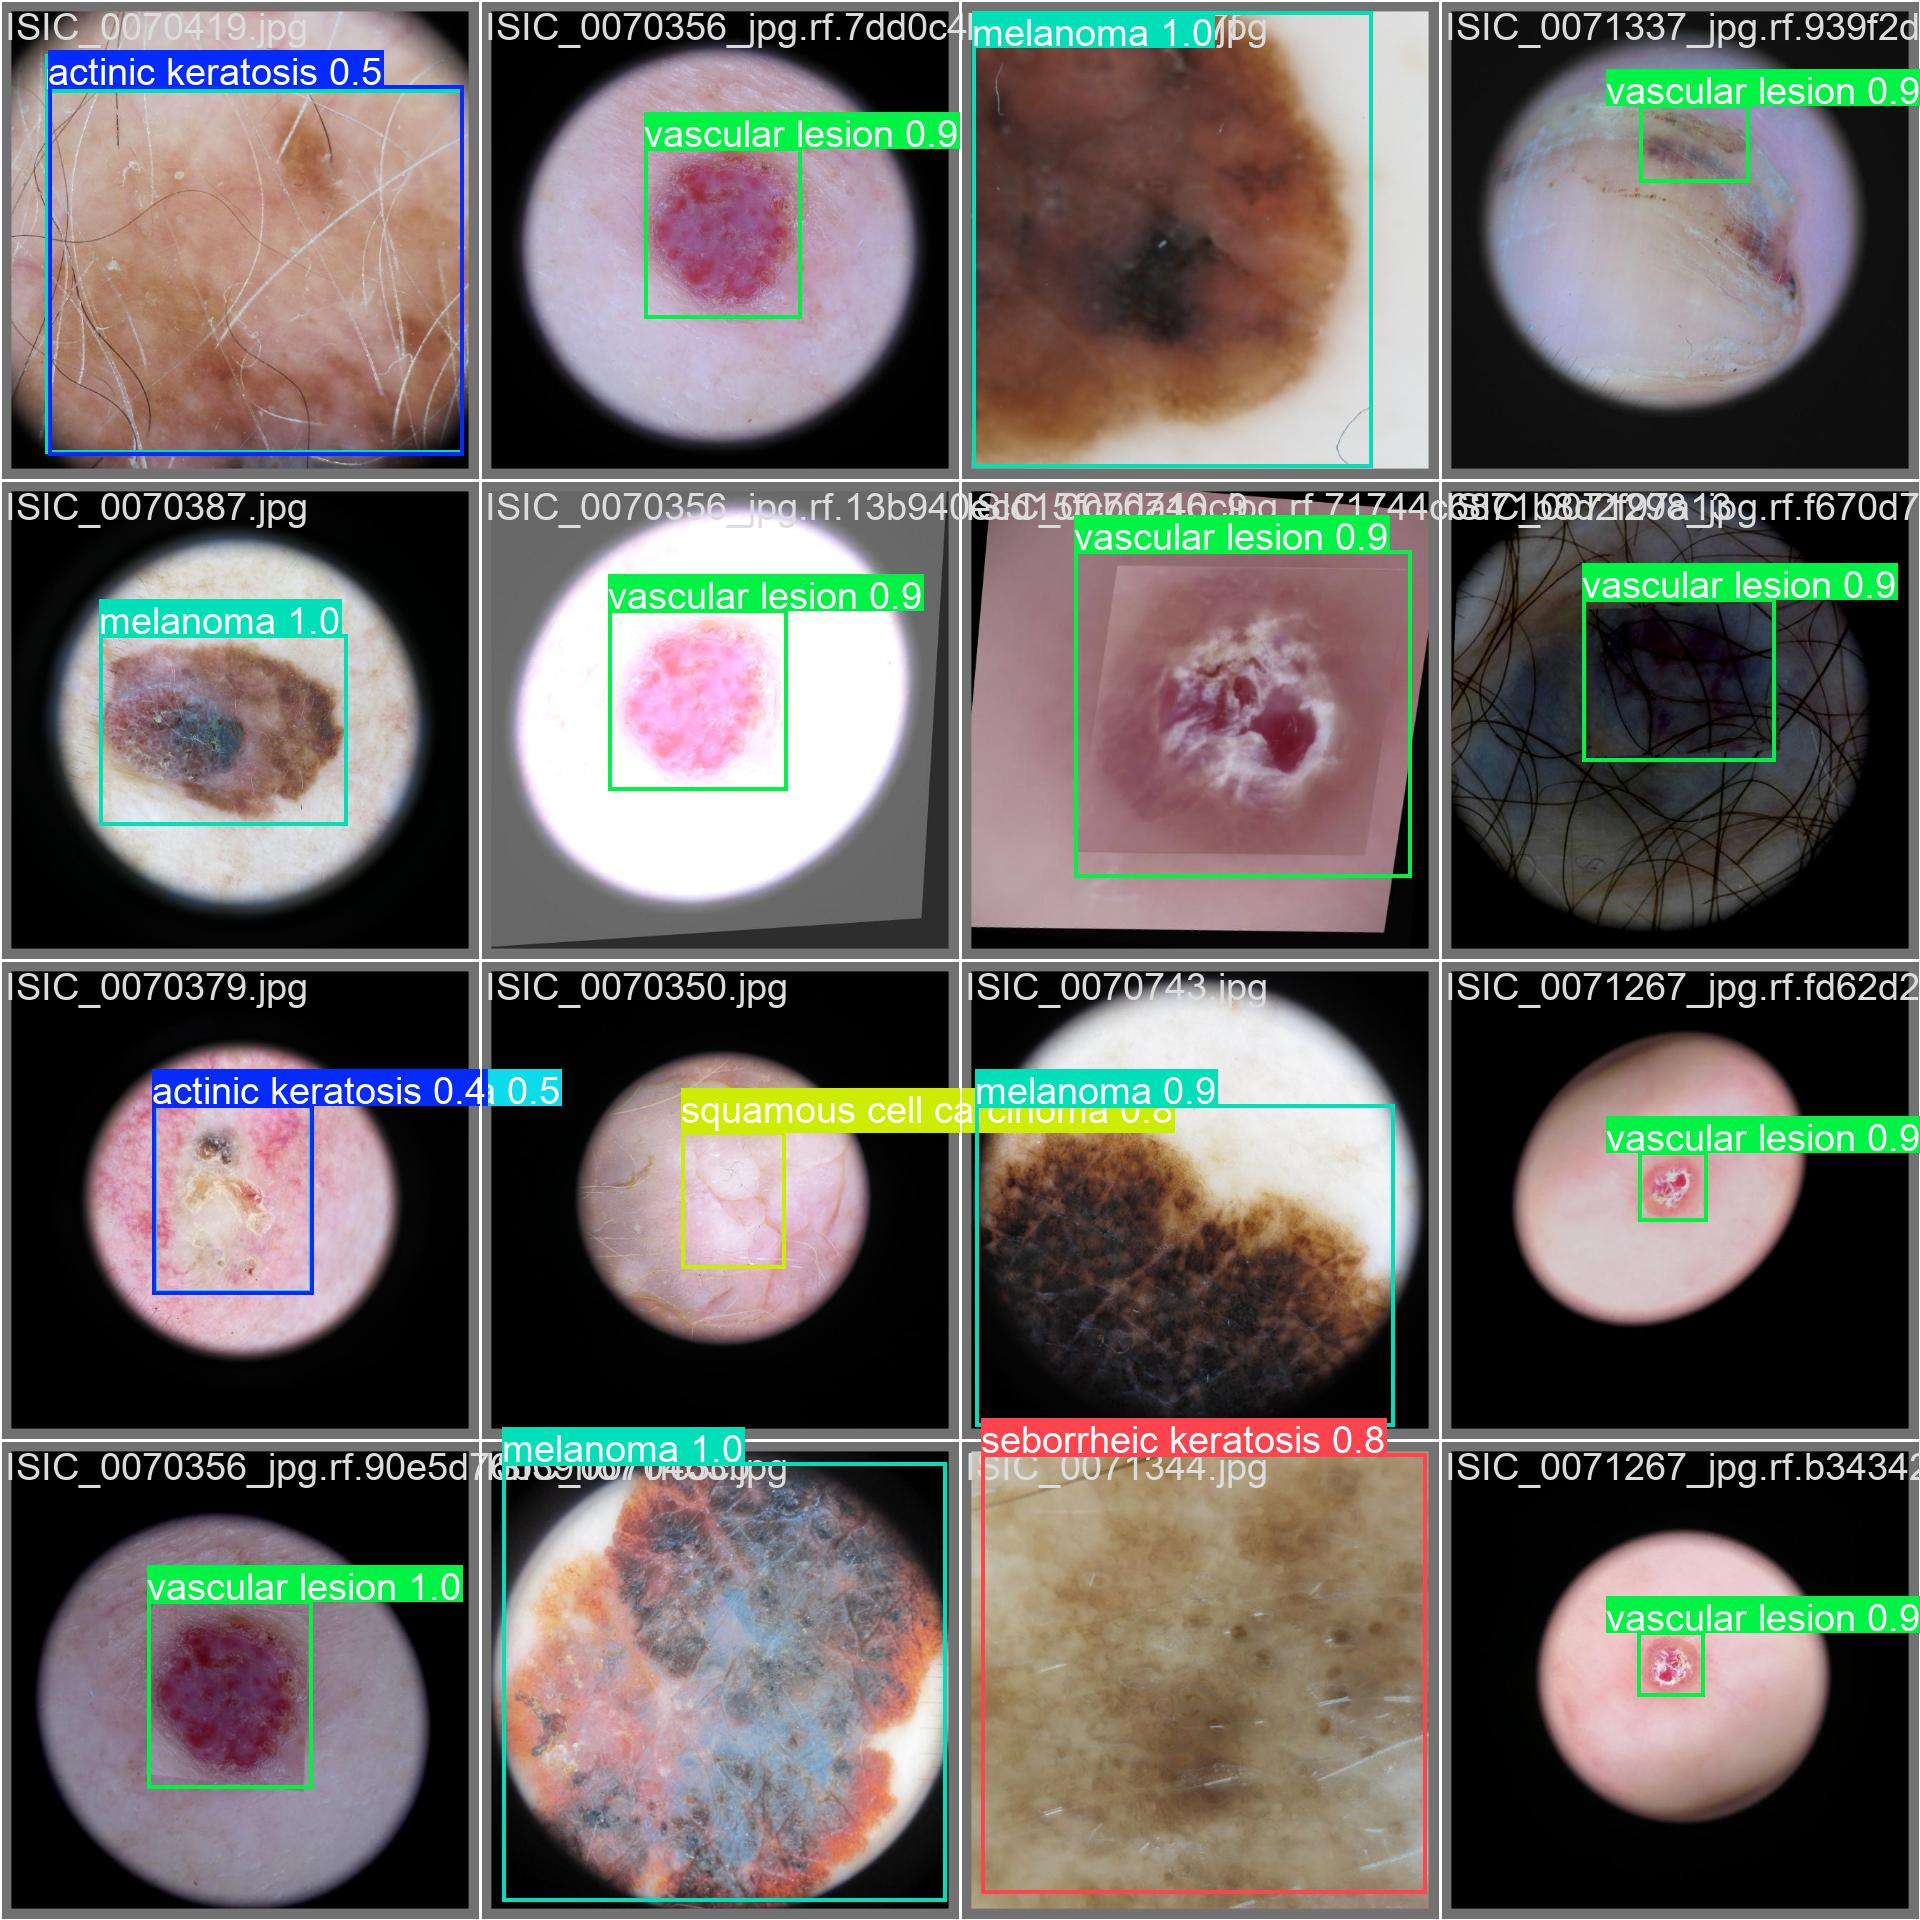

In [ ]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch1_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch1_pred.jpg', width=500))

Ground Truth


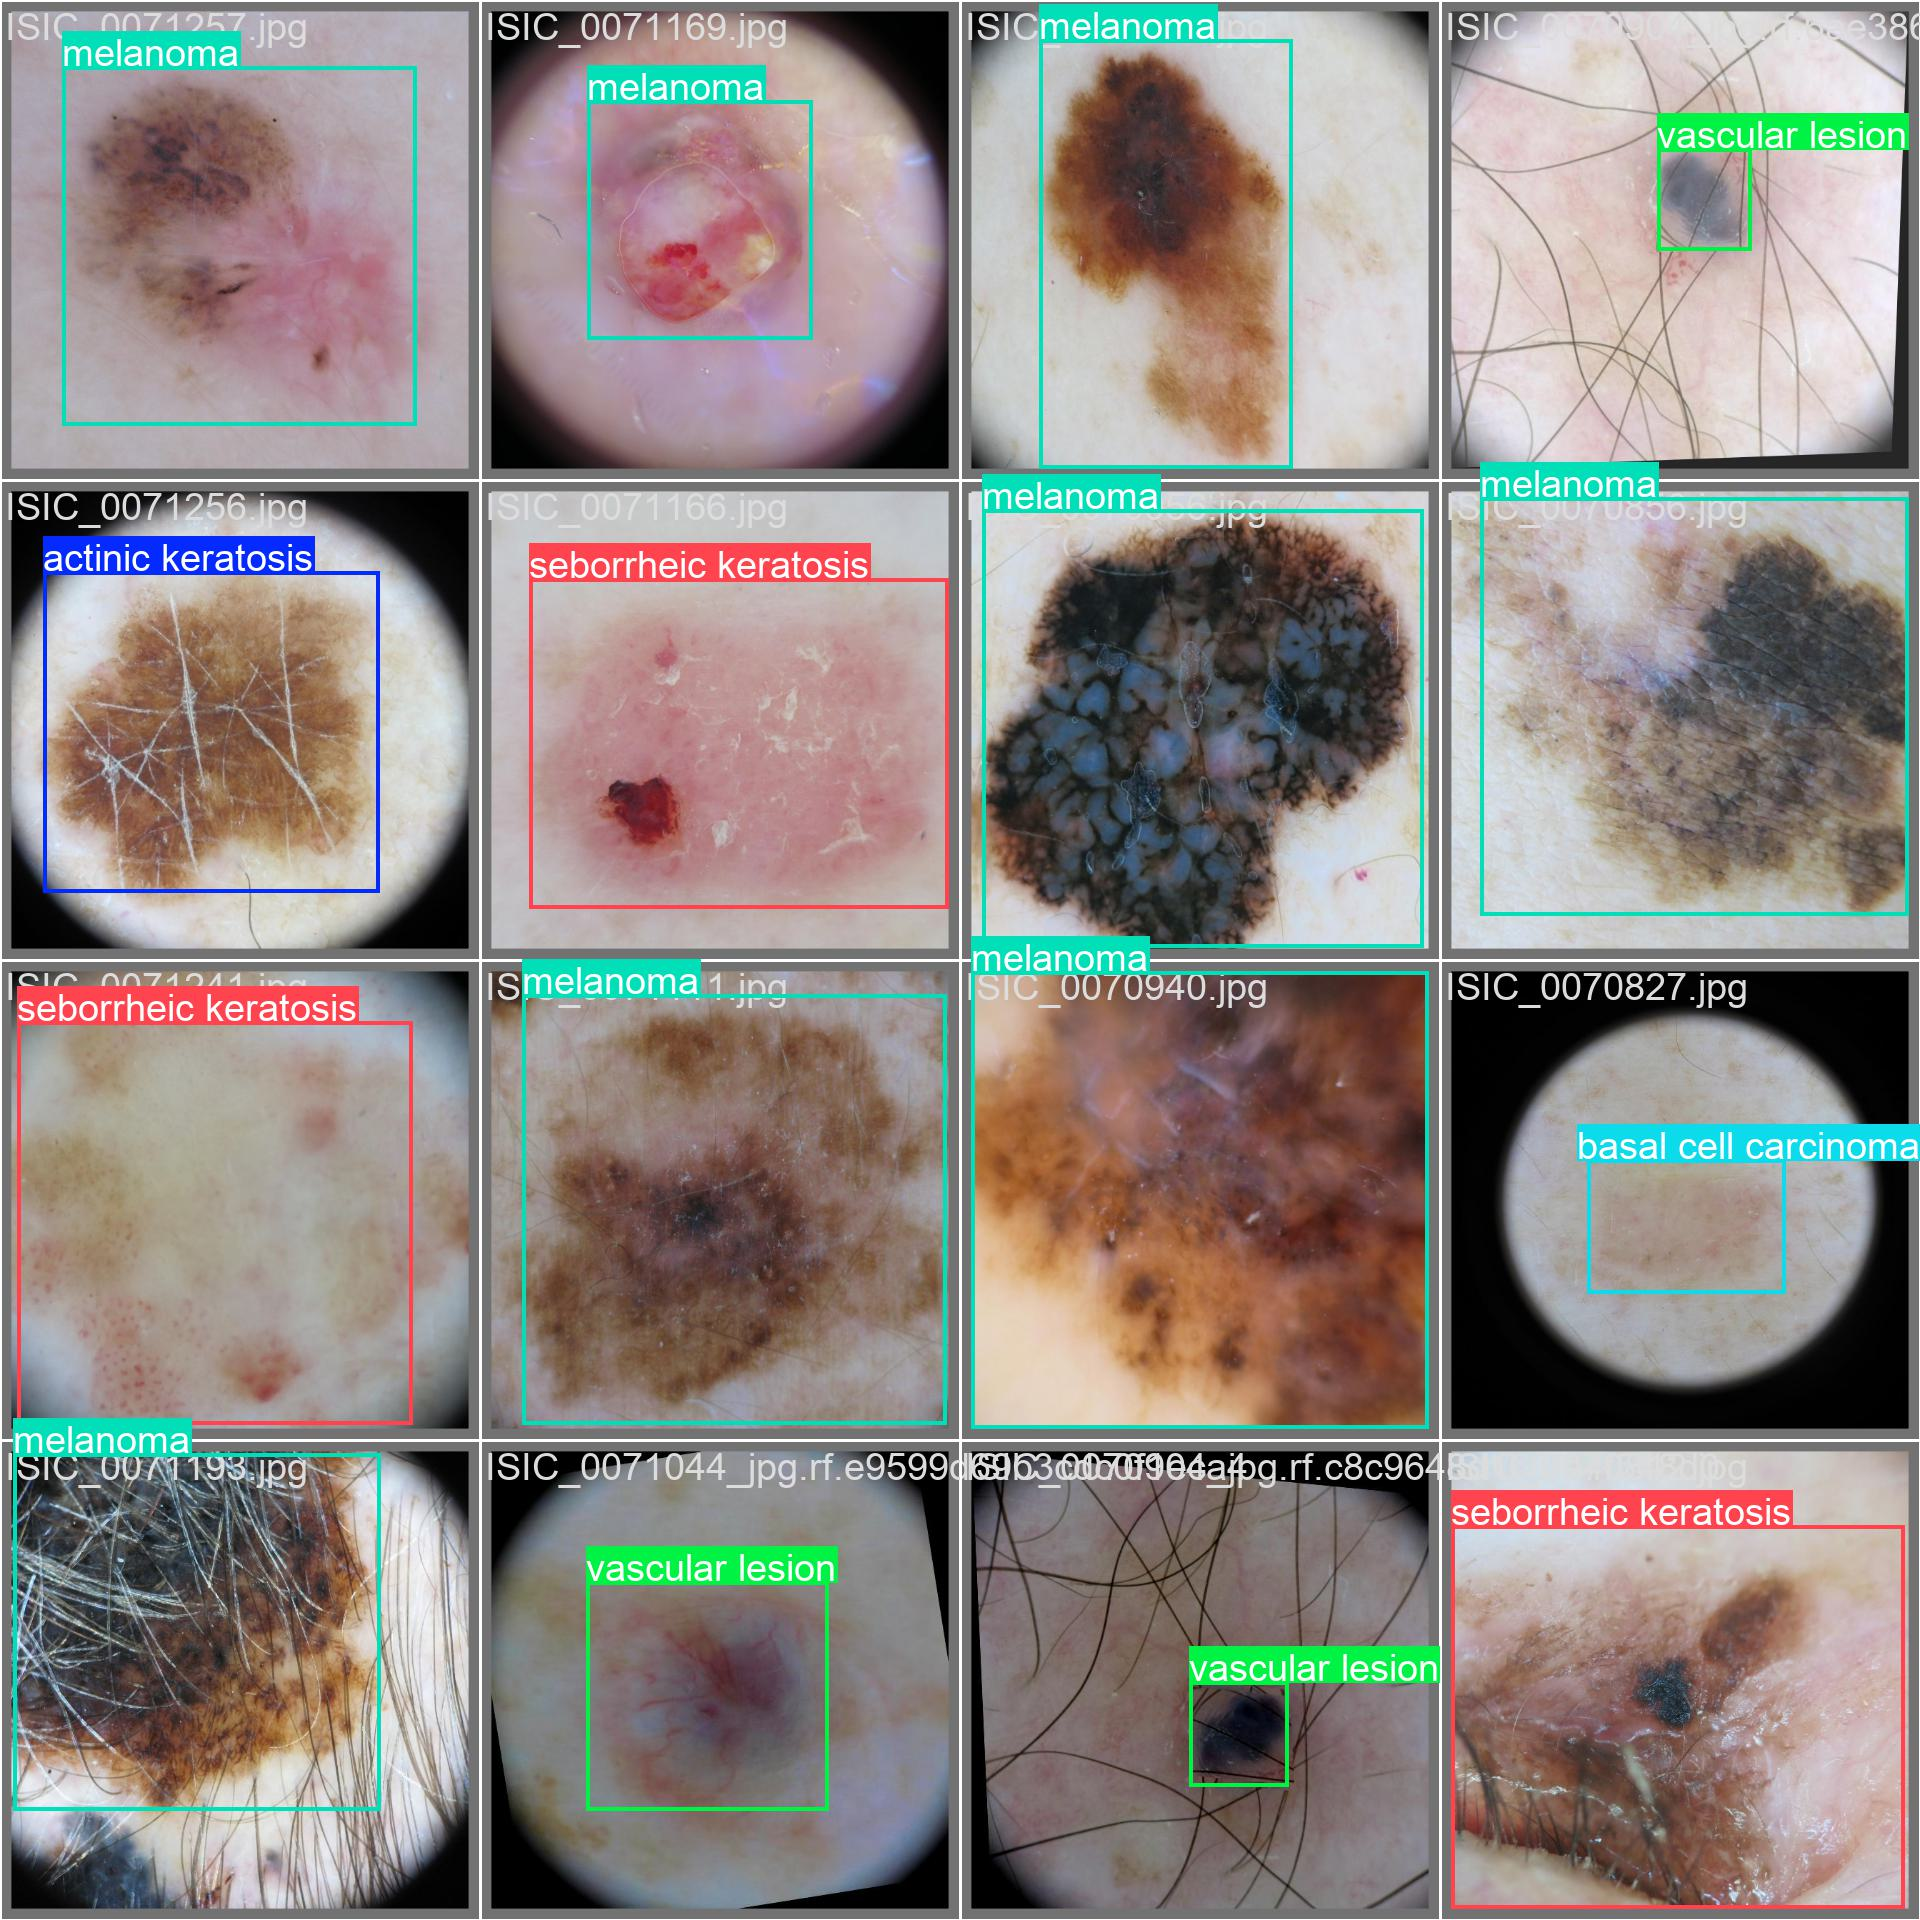


Prediction



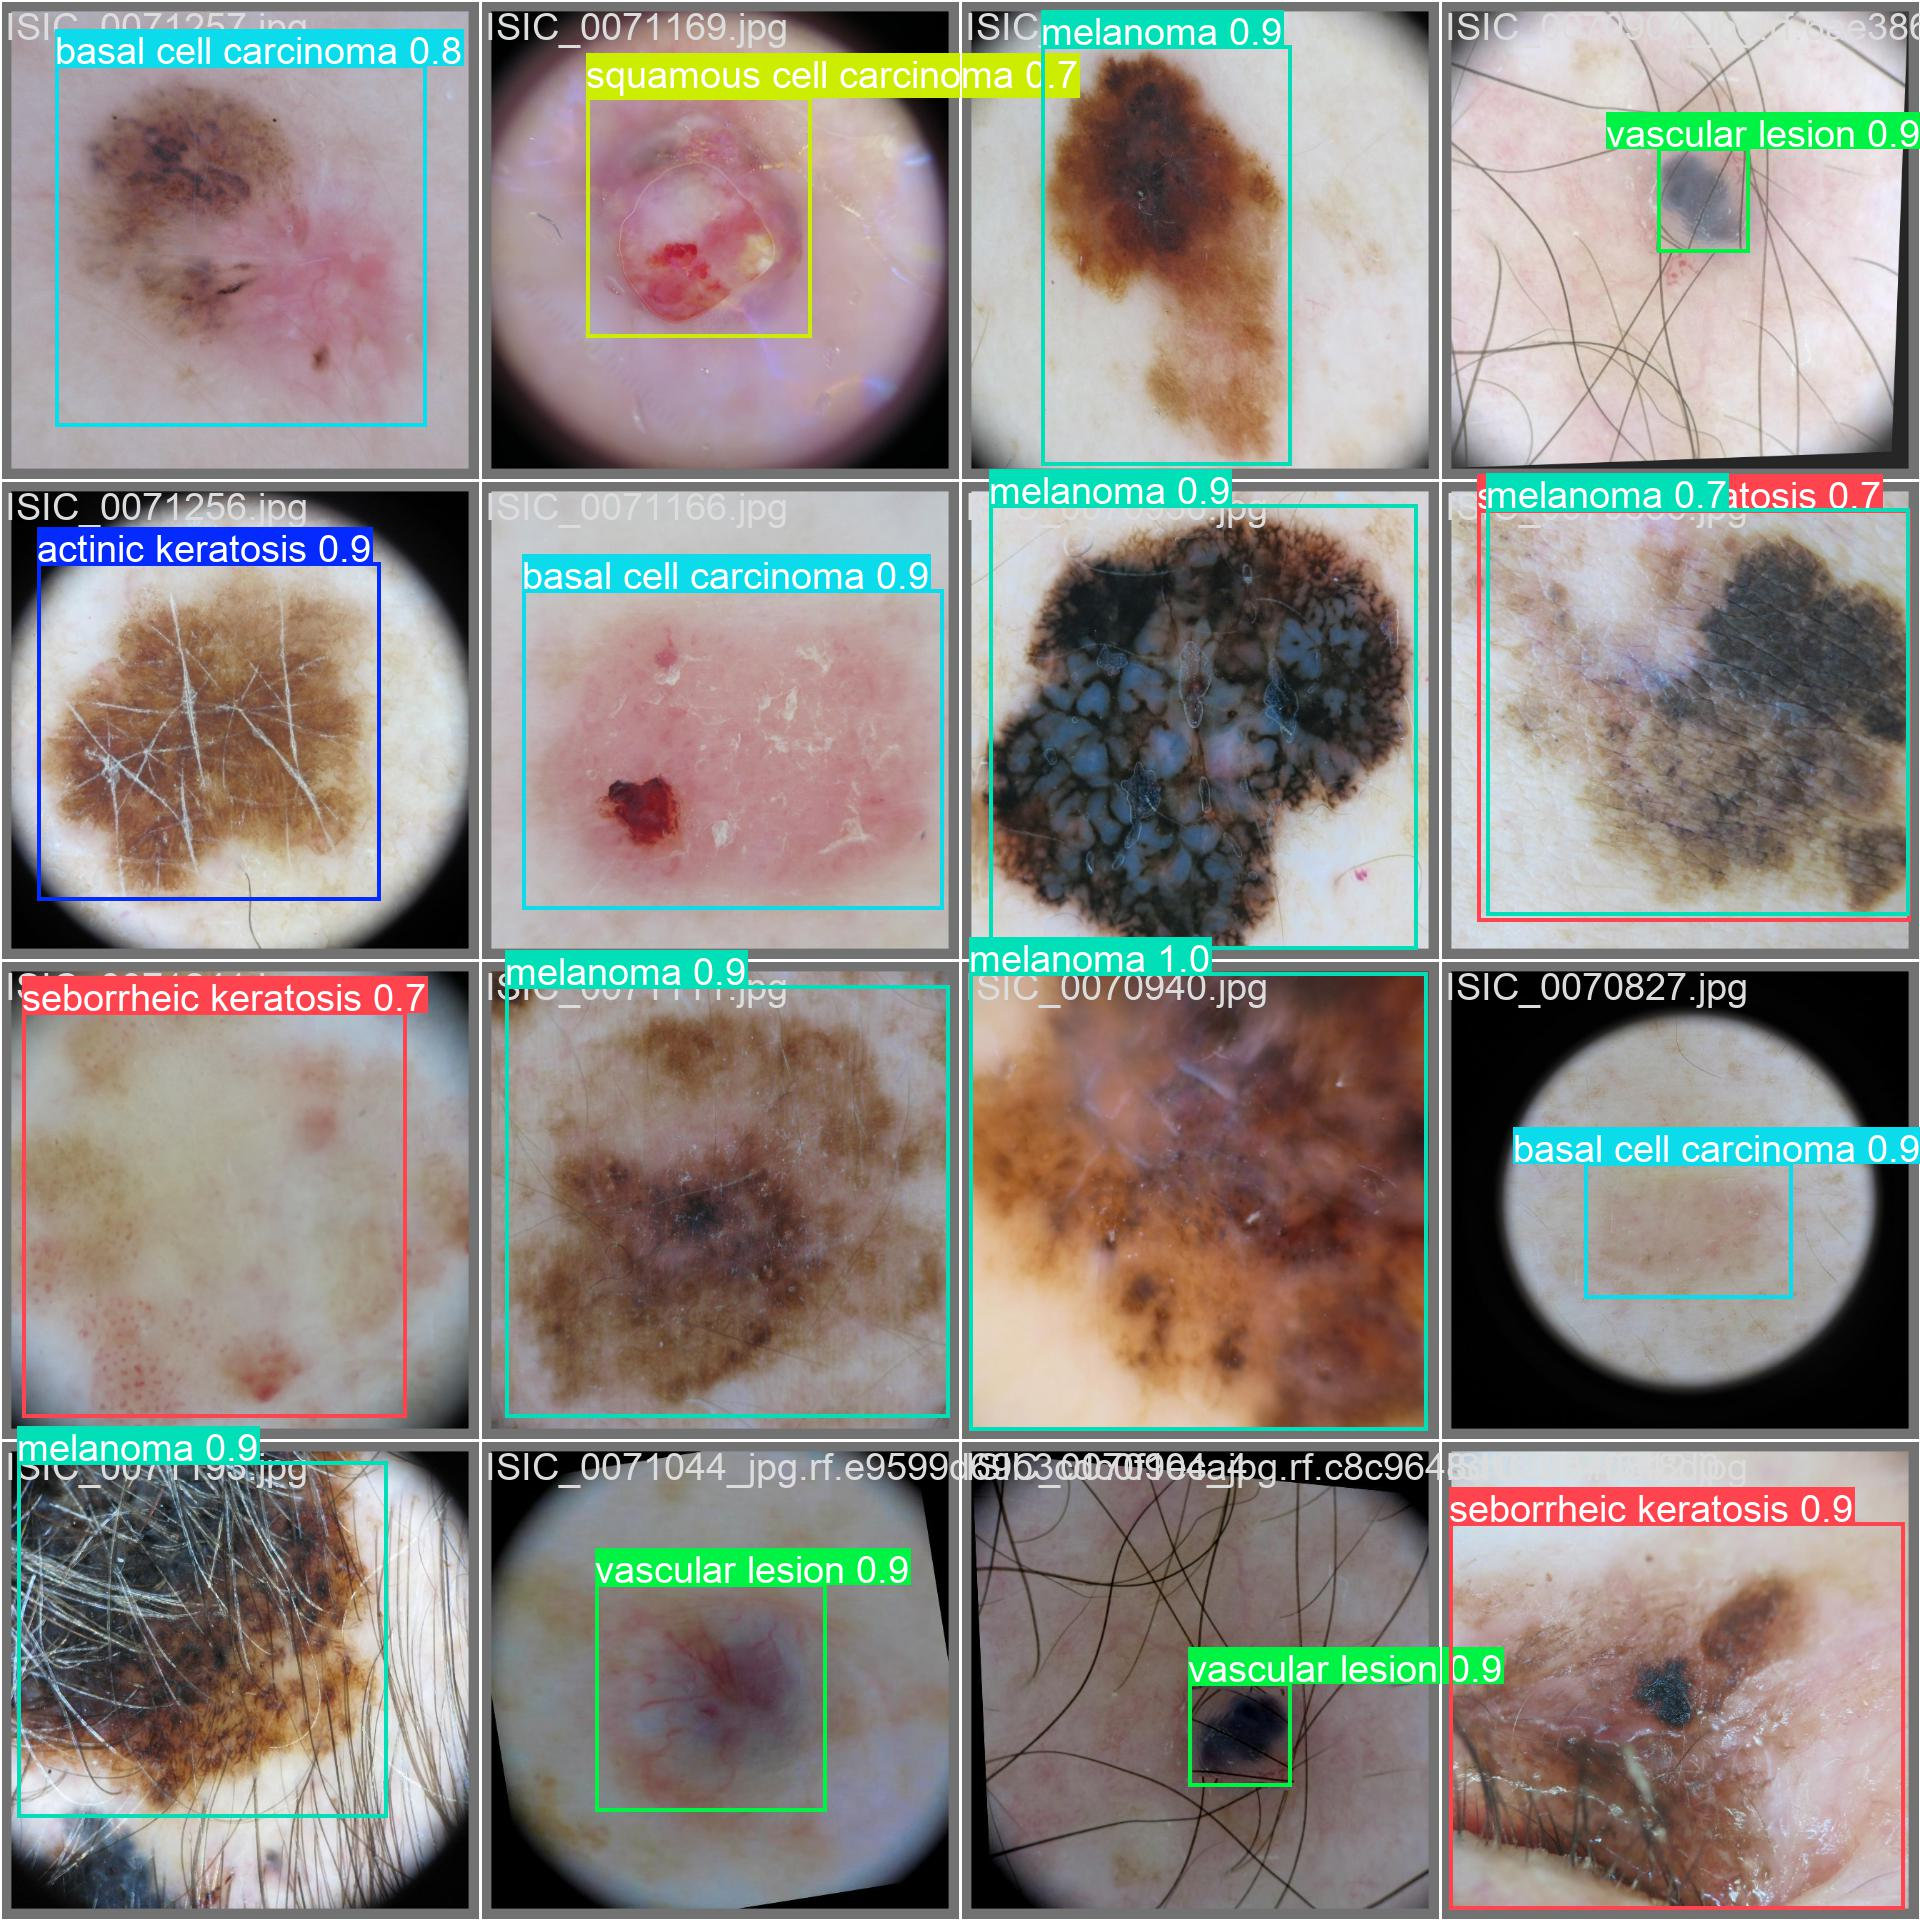

In [ ]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch2_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch2_pred.jpg', width=500))

## Testing

In [22]:
%cd {HOME}
!yolo task=detect mode=val model=last.pt conf=0.25 data=data.yaml save=True

/content
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/test/labels... 294 images, 0 backgrounds, 0 corrupt: 100% 294/294 [00:00<00:00, 2148.09it/s]
val: New cache created: /content/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:10<00:00,  1.90it/s]
                   all        294        294      0.919      0.826      0.911      0.848
     actinic keratosis         38         38      0.857      0.633      0.841      0.756
  basal cell carcinoma         37         37      0.913       0.73       0.86      0.778
          dermatofibra         13         13      0.909      0.768      0.823      0.755
              melanoma         35         35       0.91      0.943      0.964      0.931
                 nevus         44         44      0.952        0.9      0.969      0.942

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=datasets/test/images save=True

/Athaya
Ultralytics 8.3.3 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
Model summary (fused): 236 layers, 23,208,043 parameters, 0 gradients, 67.5 GFLOPs

image 1/431 /Athaya/datasets/test/images/ISIC_0011869.jpg: 640x640 1 basal cell carcinoma, 11.1ms
image 2/431 /Athaya/datasets/test/images/ISIC_0012090.jpg: 640x640 1 seborrheic keratosis, 11.3ms
image 3/431 /Athaya/datasets/test/images/ISIC_0012289.jpg: 640x640 1 actinic keratosis, 1 basal cell carcinoma, 10.7ms
image 4/431 /Athaya/datasets/test/images/ISIC_0012341.jpg: 640x640 1 basal cell carcinoma, 10.7ms
image 5/431 /Athaya/datasets/test/images/ISIC_0012352.jpg: 640x640 1 actinic keratosis, 11.0ms
image 6/431 /Athaya/datasets/test/images/ISIC_0012364.jpg: 640x640 1 squamous cell carcinoma, 10.6ms
image 7/431 /Athaya/datasets/test/images/ISIC_0012720.jpg: 640x640 1 seborrheic keratosis, 10.6ms
image 8/431 /Athaya/datasets/test/images/ISIC_0012815.jpg: 640x640 1 squamous cell carcinoma, 10.8ms
image 9/43

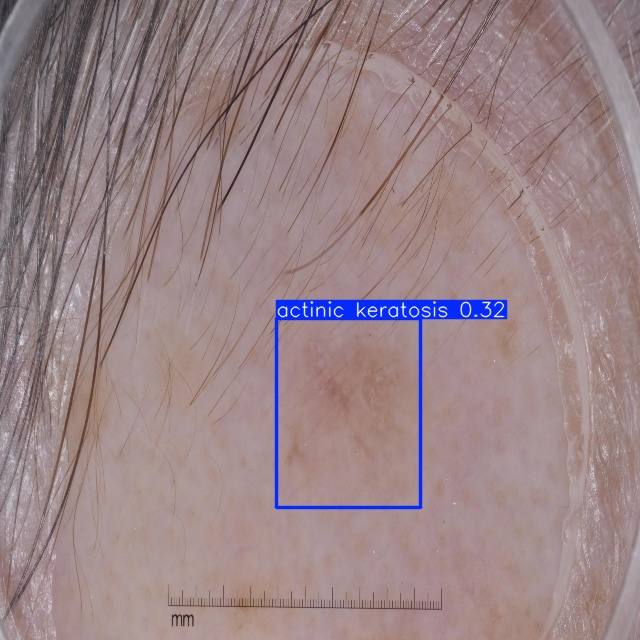

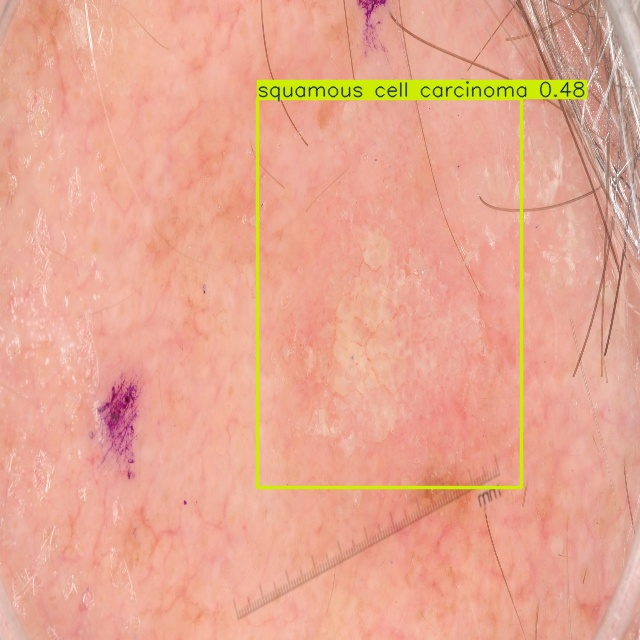

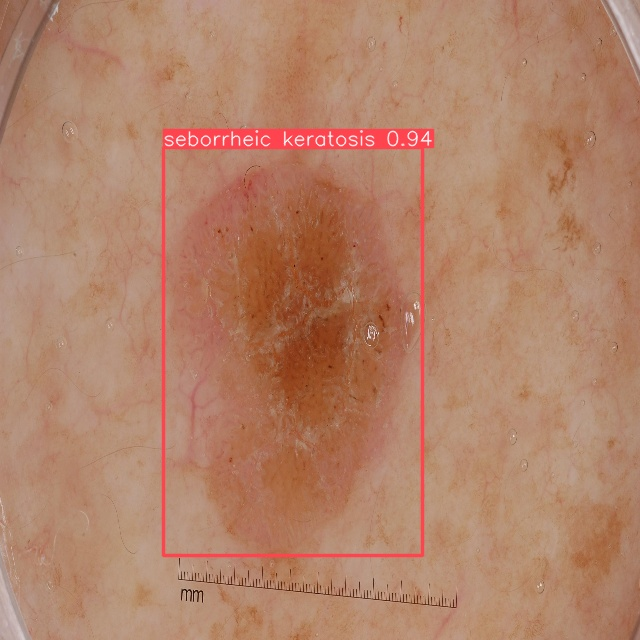

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[4:7]:
  display(Image(filename=image_path, width=600))
  print("\n")

## melihat file yang terdeteksi salah

In [16]:
import os
import cv2
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('last.pt')  # Ganti dengan model Anda

# Function to read ground truth labels
def read_ground_truth(label_file, img_w, img_h):
    true_boxes = []
    with open(label_file, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
            x_center = int(x_center * img_w)
            y_center = int(y_center * img_h)
            bbox_width = int(bbox_width * img_w)
            bbox_height = int(bbox_height * img_h)
            x1 = int(x_center - bbox_width / 2)
            y1 = int(y_center - bbox_height / 2)
            x2 = int(x_center + bbox_width / 2)
            y2 = int(y_center + bbox_height / 2)
            true_boxes.append((int(class_id), x1, y1, x2, y2))
    return true_boxes

# Function to perform inference and check predictions
def check_inference(image_folder, label_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for img_file in os.listdir(image_folder):
        if img_file.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_folder, img_file)
            label_path = os.path.join(label_folder, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))

            # Perform inference
            img = cv2.imread(img_path)
            img_h, img_w, _ = img.shape
            results = model.predict(source=img_path, save=False)

            # Extract predicted classes and boxes from results
            predicted_boxes = [(int(box.cls[0]), int(box.xyxy[0][0]), int(box.xyxy[0][1]), int(box.xyxy[0][2]), int(box.xyxy[0][3])) for box in results[0].boxes]

            # Compare with ground truth labels
            if os.path.exists(label_path):
                true_boxes = read_ground_truth(label_path, img_w, img_h)

                # Check only for class mismatches
                if len(predicted_boxes) == len(true_boxes):
                    class_mismatch = False
                    for pred_box, true_box in zip(predicted_boxes, true_boxes):
                        if pred_box[0] != true_box[0]:  # Check if class_id is different
                            class_mismatch = True
                            break

                    if class_mismatch:
                        output_image_path = os.path.join(output_folder, img_file)

                        # Display both ground truth and predicted bounding boxes
                        img_with_boxes = draw_boxes(img, true_boxes, predicted_boxes)

                        # Save the image with incorrect class prediction
                        cv2.imwrite(output_image_path, img_with_boxes)

def draw_boxes(img, true_boxes, predicted_boxes):
    img_copy = img.copy()

    # Draw ground truth boxes (in blue)
    for (class_id, x1, y1, x2, y2) in true_boxes:
        cv2.rectangle(img_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue bounding box for ground truth
        cv2.putText(img_copy, f'True: {class_id}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Draw predicted boxes (in green)
    for (class_id, x1, y1, x2, y2) in predicted_boxes:
        cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box for predictions
        cv2.putText(img_copy, f'Pred: {class_id}', (x1, y1 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return img_copy

# Main function to run inference on the folder
image_folder = '/content/test/images'  # Ganti dengan path folder gambar
label_folder = '/content/test/labels'  # Ganti dengan path folder label
output_folder = 'salah_prediksi_test'  # Folder untuk menyimpan hasil gambar yang salah prediksi

check_inference(image_folder, label_folder, output_folder)

print(f"Gambar-gambar dengan prediksi kelas yang salah disimpan di folder: {output_folder}")



image 1/1 /content/test/images/ISIC_0054060.jpg: 640x640 1 actinic keratosis, 1 basal cell carcinoma, 37.0ms
Speed: 1.7ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/images/ISIC_0022153.jpg: 640x640 1 seborrheic keratosis, 37.9ms
Speed: 2.0ms preprocess, 37.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/images/ISIC_0068779.jpg: 640x640 1 basal cell carcinoma, 1 squamous cell carcinoma, 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/images/ISIC_0068338.jpg: 640x640 1 basal cell carcinoma, 35.4ms
Speed: 1.5ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/images/ISIC_0638700.jpg: 640x640 2 melanomas, 35.4ms
Speed: 1.4ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/images/I

In [17]:
# prompt: hitung jumlah .jpg di folder salah_prediksi_

import os

def count_jpg_files(folder_path):
  """Counts the number of .jpg files in a given folder."""
  count = 0
  for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
      count += 1
  return count

# Replace 'salah_prediksi_' with the actual folder path
folder_path = "salah_prediksi_test"
num_jpg_files = count_jpg_files(folder_path)
print(f"Jumlah file .jpg di folder '{folder_path}': {num_jpg_files}")

Jumlah file .jpg di folder 'salah_prediksi_test': 61


In [18]:
# prompt: buat file txt yang berisi nama nama file dalam folder salah_prediksi_

import os

def create_txt_file_with_filenames(folder_path, output_filename):
  """Creates a txt file containing filenames from a specified folder."""

  filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  with open(output_filename, 'w') as f:
    for filename in filenames:
      f.write(filename + '\n')

# Replace 'salah_prediksi_' with the actual folder path
folder_path = "salah_prediksi_test"
output_filename = "file_list_test.txt"

create_txt_file_with_filenames(folder_path, output_filename)
print(f"File list created: {output_filename}")

File list created: file_list_test.txt


In [19]:
# prompt: hapus semua gambar di folder /content/valid yang namanya ada di file_list.txt

import os

def remove_images_from_list(folder_path, file_list_path):
  """Removes images from a folder based on a list of filenames.

  Args:
      folder_path: The path to the folder containing the images.
      file_list_path: The path to the text file containing the list of filenames
                     to be removed.
  """

  with open(file_list_path, 'r') as f:
    filenames_to_remove = [line.strip() for line in f]

  for filename in filenames_to_remove:
    image_path = os.path.join(folder_path, filename)
    if os.path.exists(image_path):
      os.remove(image_path)
      print(f"Removed: {image_path}")
    else:
      print(f"File not found: {image_path}")


# Example usage:
folder_path = '/content/test/images'
file_list_path = 'file_list_test.txt'
remove_images_from_list(folder_path, file_list_path)

Removed: /content/test/images/ISIC_0022153.jpg
Removed: /content/test/images/ISIC_0029683.jpg
Removed: /content/test/images/ISIC_0060670.jpg
Removed: /content/test/images/ISIC_0053569.jpg
Removed: /content/test/images/ISIC_0027577.jpg
Removed: /content/test/images/ISIC_2287405.jpg
Removed: /content/test/images/ISIC_0022741.jpg
Removed: /content/test/images/ISIC_0029525.jpg
Removed: /content/test/images/ISIC_0014116.jpg
Removed: /content/test/images/ISIC_0012799.jpg
Removed: /content/test/images/ISIC_6397037.jpg
Removed: /content/test/images/ISIC_0059162.jpg
Removed: /content/test/images/ISIC_0014574.jpg
Removed: /content/test/images/ISIC_0020966.jpg
Removed: /content/test/images/ISIC_6255931.jpg
Removed: /content/test/images/ISIC_1306256.jpg
Removed: /content/test/images/ISIC_0057409.jpg
Removed: /content/test/images/ISIC_0067599.jpg
Removed: /content/test/images/ISIC_0031485.jpg
Removed: /content/test/images/ISIC_0014096.jpg
Removed: /content/test/images/ISIC_7770086.jpg
Removed: /con

In [20]:
# prompt: buatkan code untuk menghapus file label di valid/labels untuk nama nama yang ada di file_list.txt

def remove_labels_for_filenames(label_folder, file_list_path):
  """Removes label files from a folder based on a list of filenames.

  Args:
      label_folder: The path to the folder containing the label files.
      file_list_path: The path to the text file containing the list of filenames
                     to be used for removing label files.
  """

  with open(file_list_path, 'r') as f:
    filenames_to_match = [line.strip().replace('.jpg', '.txt') for line in f]

  for filename in os.listdir(label_folder):
    if filename in filenames_to_match:
      label_path = os.path.join(label_folder, filename)
      if os.path.exists(label_path):
        os.remove(label_path)
        print(f"Removed: {label_path}")
      else:
        print(f"File not found: {label_path}")


# Example usage:
label_folder = '/content/test/labels'  # Replace with your label folder path
file_list_path = 'file_list_test.txt'  # Replace with your file list path
remove_labels_for_filenames(label_folder, file_list_path)

Removed: /content/test/labels/ISIC_2288382.txt
Removed: /content/test/labels/ISIC_8760682.txt
Removed: /content/test/labels/ISIC_6015979.txt
Removed: /content/test/labels/ISIC_6503328.txt
Removed: /content/test/labels/ISIC_6397037.txt
Removed: /content/test/labels/ISIC_0014116.txt
Removed: /content/test/labels/ISIC_0053569.txt
Removed: /content/test/labels/ISIC_5502098.txt
Removed: /content/test/labels/ISIC_9003833.txt
Removed: /content/test/labels/ISIC_0027577.txt
Removed: /content/test/labels/ISIC_0011708.txt
Removed: /content/test/labels/ISIC_5375398.txt
Removed: /content/test/labels/ISIC_6889402.txt
Removed: /content/test/labels/ISIC_0013442.txt
Removed: /content/test/labels/ISIC_0029525.txt
Removed: /content/test/labels/ISIC_1306256.txt
Removed: /content/test/labels/ISIC_0012340.txt
Removed: /content/test/labels/ISIC_6255931.txt
Removed: /content/test/labels/ISIC_0022741.txt
Removed: /content/test/labels/ISIC_0021887.txt
Removed: /content/test/labels/ISIC_5221028.txt
Removed: /con

In [21]:
"""menghitung jumlah gambar setiap kelas dari folder datasets"""

import os
from collections import defaultdict

# Fungsi untuk menghitung jumlah gambar per kelas berdasarkan file label
def count_images_per_class(label_dir):
    class_count = defaultdict(int)

    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            with open(label_path, 'r') as f:
                lines = f.readlines()
                if lines:
                    class_id = int(lines[0].split()[0])  # Ambil digit pertama (class_id)
                    class_count[class_id] += 1

    return class_count

# Fungsi untuk menghitung total per subset (train, valid, test)
def count_all_images(dataset_dir):
    subsets = ['train', 'valid', 'test']
    total_count = {}

    for subset in subsets:
        label_dir = os.path.join(dataset_dir, subset, 'labels')
        count_per_class = count_images_per_class(label_dir)
        total_count[subset] = count_per_class

    return total_count

# Jalankan fungsi
dataset_dir = '/content'  # Ganti dengan path ke dataset-mu
class_counts = count_all_images(dataset_dir)

# Tampilkan hasil
for subset, counts in class_counts.items():
    print(f"\nJumlah gambar per kelas di folder {subset}:")
    for class_id, count in counts.items():
        print(f"Class {class_id}: {count} images")



Jumlah gambar per kelas di folder train:
Class 3: 3495 images
Class 6: 3493 images
Class 4: 3490 images
Class 1: 3462 images
Class 5: 3500 images
Class 2: 3499 images
Class 9: 3499 images
Class 0: 3467 images
Class 7: 3461 images
Class 8: 3476 images

Jumlah gambar per kelas di folder valid:
Class 1: 166 images
Class 8: 149 images
Class 4: 184 images
Class 9: 196 images
Class 0: 149 images
Class 6: 149 images
Class 2: 150 images
Class 3: 139 images
Class 7: 150 images
Class 5: 175 images

Jumlah gambar per kelas di folder test:
Class 6: 31 images
Class 0: 38 images
Class 8: 39 images
Class 4: 44 images
Class 5: 35 images
Class 3: 35 images
Class 1: 37 images
Class 2: 13 images
Class 7: 11 images
Class 9: 11 images
